# Teoría de señales - Taller 
##  Brayan Valencia Quintero - Andres Castaño Velasquez - Johan Sebastian Palacios 

## Primera Parte

### Librerias

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sympy.solvers import solve_linear_system #Para resolver el sistema lineal
from sympy import Symbol #Para definir los simbolos
import sympy as sym
from scipy.signal import hilbert, chirp,  lti 
from scipy.fftpack import fft, fftfreq, fftshift #Transformada, frecuencias y centrado
from scipy import signal
from scipy.integrate import cumtrapz #Para integrar con el metodo de trapecios acumulando
from sympy.matrices import Matrix #Trabajo con matrices


warnings.filterwarnings("ignore")


###1.Señal Pulso Cuadrado

In [ ]:
A = 2
T = 1 #5 segundos de grafica
Fs = 1000 # 500 muestras por segundo Ajustar según señal estudiada
Nm = T*Fs #numero de muestras requeridas
t = np.linspace(-T/2,T/2,Nm)
 
signal = np.concatenate((-A*np.ones(int(200)), A*np.ones(int(200)), -A*np.ones(int(200)), (A*np.ones(int(200))),(-A*np.ones(int(200))), ), axis=0)
plt.figure(figsize=(10,5), dpi=90)
plt.plot(t, signal,label='Pulso Cuadrado')
plt.title(r'Señal Pulso Cuadrado')
plt.ylabel('Amplitud')
plt.xlabel('Tiempo(t)')
plt.legend()
plt.grid(True)

NameError: ignored

###2. Serie de Fourier Señal Pulso Cuadrado

In [ ]:
T = t[-1] - t[0]
a0 = (2/T) * np.trapz(signal, t)
an = lambda n:(2/T) * np.trapz(signal*np.cos(2*n*np.pi*t/T), t)
bn = lambda n:(2/T) * np.trapz(signal*np.sin(2*n*np.pi*t/T), t)

In [ ]:
def graf(sig1, sig2, N=None):
    plt.figure(figsize=(10, 5), dpi=90)
 
    plt.plot(t, sig1, '--', label='Señal Cuadrada')
    plt.plot(t, sig2, label=f'Serie de Fourier (N={N})')
    plt.title(r'Serie de Fourier Señal Pulso Cuadrado')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud')
    plt.legend()
    plt.grid(True)

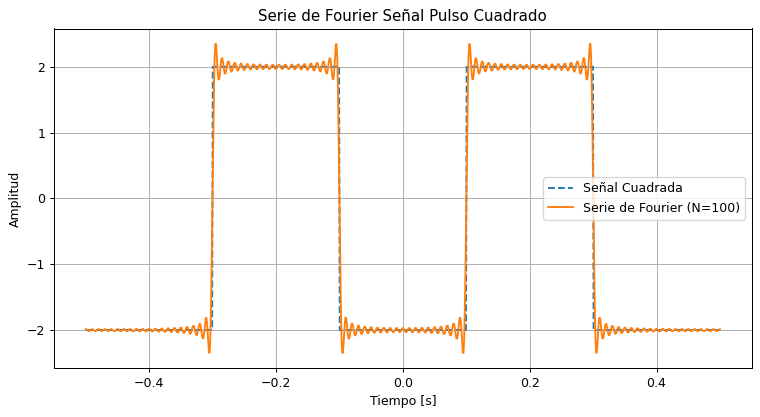

In [ ]:
N = 100

p = [-0.4]
for n in range(1, N+1):
    p.append(an(n)*np.cos(2*n*np.pi*t/T) + bn(n)*np.sin(2*n*np.pi*t/T))
p = np.array(p)
signal_ = p.sum(axis=0)
 
graf(signal, signal_, N)

### 3. Transformada de Fourier Señal Cuadrada

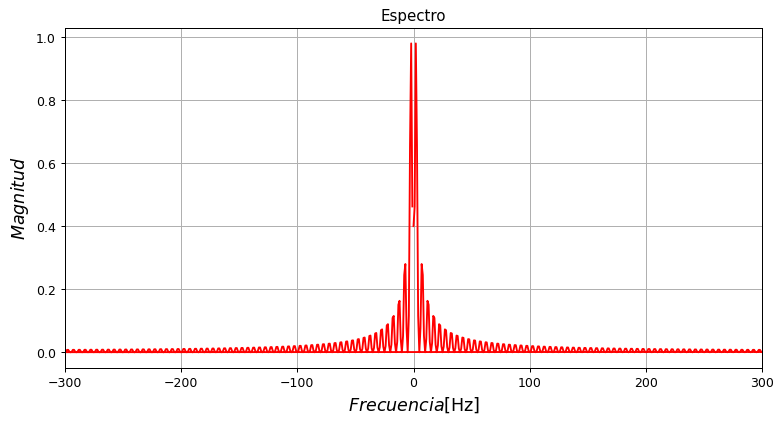

In [ ]:
ffts = np.fft.fft(signal) #cálculo FFT
vfs = np.fft.fftfreq(len(signal),1/Fs) #calculo vector de frecuencias

plt.figure(figsize=(10,5), dpi=90)
plt.plot(vfs,abs(ffts)/len(vfs),'r')
plt.title(r'Espectro')
plt.xlabel(r'$Frecuencia$[Hz]',fontsize = 14)
plt.ylabel(r'$Magnitud$',fontsize = 14)
plt.xlim(-300,300)
plt.grid(True)
plt.show()

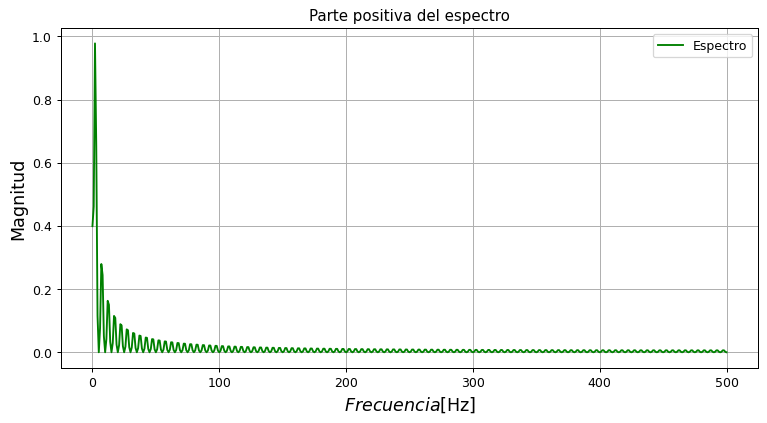

In [ ]:
vfs = np.fft.rfftfreq(len(signal),1/Fs) #calculo vector de frecuencias
ffts = np.fft.rfft(signal) #cálculo FFT
plt.figure(figsize=(10,5), dpi=90)
plt.plot(vfs,abs(ffts)/(2*len(vfs)),'g', label= 'Espectro')
plt.legend()
plt.title(r'Parte positiva del espectro')
plt.xlabel(r'$Frecuencia$[Hz]',fontsize = 14)
plt.ylabel(r'Magnitud',fontsize = 14)
#plt.xlim(0,300)
plt.grid(True)
plt.show()

### 4. Transformada de Laplace Señal Cuadrada

In [ ]:

t = sym.Symbol('t')
s = sym.Symbol('s')
 
Pc = sym.Piecewise((0,t<0),(1,t>=0))
 
LPc = sym.laplace_transform(Pc,t,s)
 
LPc
print('\n f(t) =Pulso Cuadrado: \n')
sym.pprint(Pc)
sym.pprint(LPc)


 f(t) =Pulso Cuadrado: 

⎧0  for t < 0
⎨            
⎩1  otherwise
                ⎛⎧0  for t < 0      ⎞
LaplaceTransform⎜⎨            , t, s⎟
                ⎝⎩1  otherwise      ⎠


### 5. Serie de Fourier Señal Aperiodica

ValueError: ignored

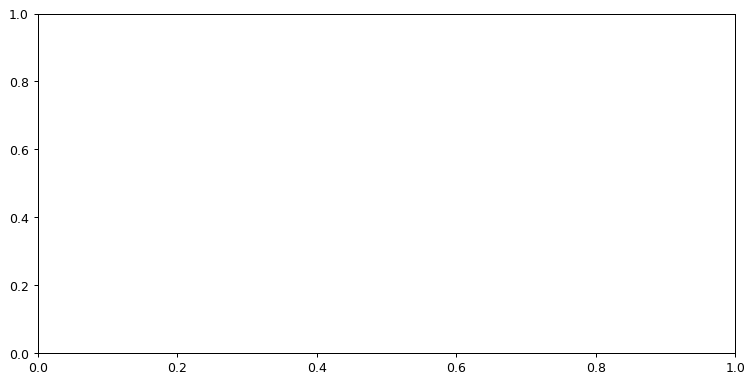

In [ ]:

#A = 2.5
#T = 2 #5 segundos de grafica
#Fs = 1000 # 500 muestras por segundo Ajustar según señal estudiada
#Nm = T*Fs
#t = np.linspace(-T/2,T/2,Nm)
sa =  np.concatenate((-A*np.ones(int(300)), A*np.ones(int(300)), -A*np.ones(int(500)), (A*np.ones(int(500))),(-A*np.ones(int(400))), ), axis=0)
fftsa = np.fft.rfft(sa)
plt.figure(figsize=(10,5), dpi=90)
plt.plot(t,sa, label= 'Señal Aperiodica')
plt.title('Señal Aperiodica')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

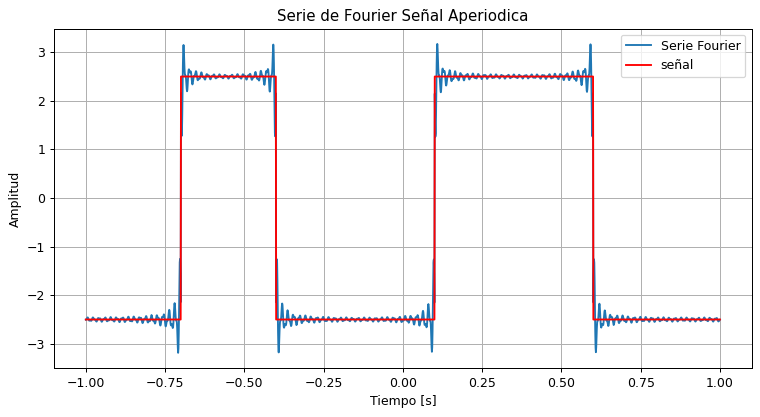

In [ ]:
vf = np.fft.rfftfreq(len(sa),1/Fs) #calculo vector de frecuencias
Xw = np.fft.rfft(sa) #cálculo FFT
 
 
xe = np.fft.irfft(Xw)
 
ind = range(110,250)
Xwf = Xw.copy()
Xwf[ind] = 0
xe2 = np.fft.irfft(Xwf)
plt.figure(figsize=(10,5), dpi=90)
plt.plot(tsa,xe2)
plt.plot(tsa,xe,'r')
plt.title('Serie de Fourier Señal Aperiodica')
plt.legend(('Serie Fourier','señal'))
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

### 6. Transformada de Fourier Señal Aperiodica




In [ ]:
vf = np.fft.fftfreq(len(sa),1/Fs) #calculo vector de frecuencias
fftsa = np.fft.fft(sa) #cálculo FFT
plt.figure(figsize=(10,5), dpi=90)
plt.plot(vf,abs(fftsa)/len(vf),'r')
plt.title(r'Espectro')
plt.xlabel(r'$Frecuencia$[Hz]',fontsize = 14)
plt.ylabel(r'$Magnitud$',fontsize = 14)
plt.xlim(-200,200)
plt.grid(True)
plt.show()

NameError: ignored

In [ ]:
vf = np.fft.rfftfreq(len(sa),1/Fs) #calculo vector de frecuencias
fftsa = np.fft.rfft(sa) #cálculo FFT
plt.figure(figsize=(10,5), dpi=90)
plt.plot(vf,abs(fftsa)/(2*len(vf)),'b')
plt.title(r'parte positva del espectro')
plt.xlabel(r'$f$[Hz]',fontsize = 14)
plt.ylabel(r'magnitud',fontsize = 14)
plt.xlim(0,200)
plt.grid(True)
plt.show()

NameError: ignored

### 7. Transformada de Laplace Funcion Aperiodica

In [ ]:
import sympy as sym
t = sym.Symbol('t')
s = sym.Symbol('s')
 
Fa = sym.DiracDelta(t-2)
Fal = sym.laplace_transform(Fa,t,s)
 
print('\n f(t) = Delta: \n')
sym.pprint(Fa)
sym.pprint(Fal)


 f(t) = Delta: 

δ(t - 2)
⎛ -2⋅s          ⎞
⎝ℯ    , -∞, True⎠


### 8. Hallar la funcion de transferencia del  siguiente circuito:

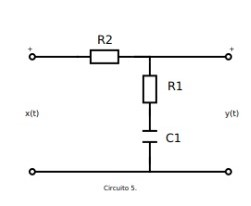



In [ ]:
R1 = Symbol('R1')
R2 = Symbol('R2')
C1 = Symbol('C1')
 
I1 = Symbol('I1')
 
x = Symbol('x')
jw = Symbol('jw')

Se organiza la matriz con la maya $I $del circuito, previamente encontrado 

In [ ]:
M = Matrix([[R1+R2+1/C1*jw]])#matriz de impedancias
V = Matrix([x])#variables a encontrar 
I = Matrix([I1])#variables definidas
M

Matrix([[R1 + R2 + jw/C1]])

Solucionamos la ecuacion

In [ ]:
sol = solve_linear_system(M.col_insert(1, V), *I)#resolvemos el sistema lineal de matrices 
sol

{I1: C1*x/(C1*R1 + C1*R2 + jw)}

Hallamos la salida **$Y(W)$** la cual es la tensión entre la resistencia **$R1$**  y el capacitor **$C1$**. Por lo que tomamos  R1 + C1 y lo multiplicamos por la corriente de la malla que pasa por este elemento que nombramos como **$I1$**.

In [ ]:
Y = (R1+1/(C1*jw))*sol[I1]
H = Y/x #Obtenemos la funcion de transferencia 
H

C1*(R1 + 1/(C1*jw))/(C1*R1 + C1*R2 + jw)

In [ ]:
Hs = H.simplify()#Verificamos si tiene alguna simplificación
Hs

(C1*R1*jw + 1)/(jw*(C1*R1 + C1*R2 + jw))

Hallamos los Coeficientes 

In [ ]:
expr_num, expr_den = H.simplify().as_numer_denom() #extrae la expresion del num y den y las guarda
num_coeffs = sym.poly(-expr_num, jw).all_coeffs() #extrae los coeficientes del num
den_coeffs = sym.poly(-expr_den, jw).all_coeffs() #extrae los coeficientes del den
print(num_coeffs, den_coeffs)

[-C1*R1, -1] [-1, -C1*R1 - C1*R2, 0]


Asignamos valores a cada uno de nuestros elementos y definimos numerador y denominador de la siguiente manera.

In [ ]:
R1 = 10000
R2 = 10000
C1 = 10*10**-6

num = [-C1*R1, -1] #Lo extraigo de num_coeffs
den = [-C1*R1 -C1*R2, -1]

Hallamos la respuesta impulso.

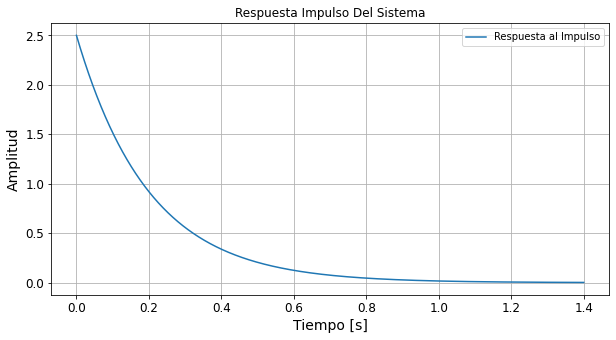

In [ ]:
lti_system = lti(num, den)   #LTI

t, h = lti_system.impulse(N=2000) 

plt.figure(figsize=(10,5))
plt.plot(t,h,label='Respuesta al Impulso')
plt.title('Respuesta Impulso Del Sistema')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

In [ ]:
def pulse(t, width=0.5):
    width /= 4
    
    
    return t, 1.2247*np.array(np.array((t.mean()-(t.max()*width)) < t, dtype=np.int)) * 1.2247*np.array(t <(t.max()*width+t.mean()), dtype=np.int)

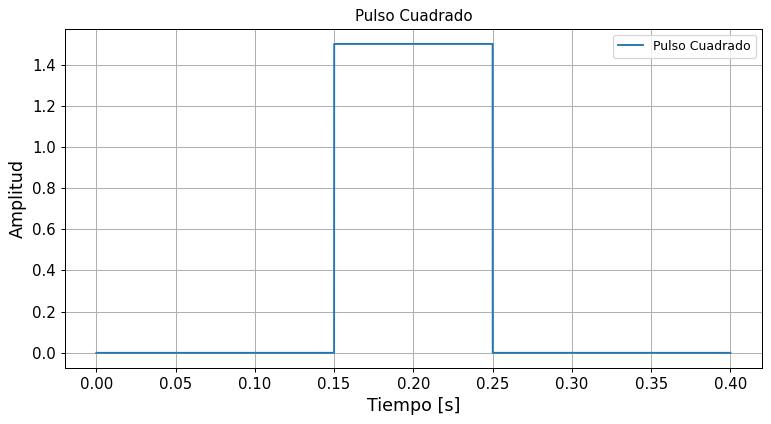

In [ ]:
t = np.linspace(0,.4,10000)
t, pulso = pulse(t) #entrega dos variables

plt.figure(figsize=(10,5), dpi=(90))
plt.plot(t,pulso, label = 'Pulso Cuadrado')
plt.title('Pulso Cuadrado')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

 Cambio entrada del sistema por el pulso $x(t) = rect_{\tau}(t)$.

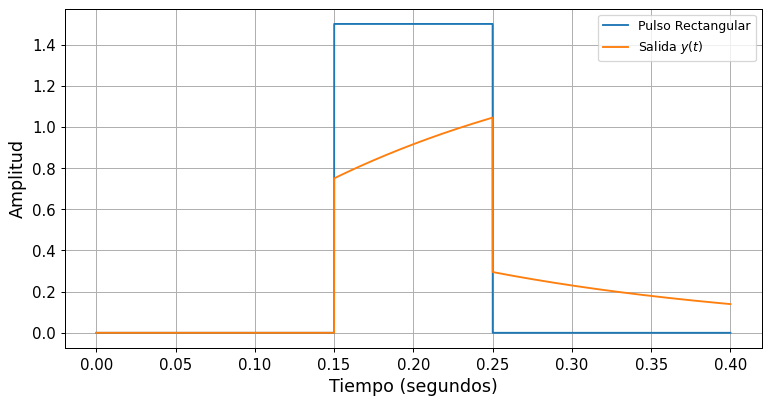

In [ ]:
_,salida_,_= lti_system.output(pulso, t)
plt.figure(figsize=(10,5), dpi=90)
plt.plot(t, pulso,label="Pulso Rectangular")
plt.plot(t, salida_,label="Salida $y(t)$")
plt.legend()


plt.xlabel("Tiempo (segundos)")
plt.ylabel("Amplitud")
plt.grid()

#### Salida En Tiempo y(t)

Text(0, 0.5, 'Amplitud')

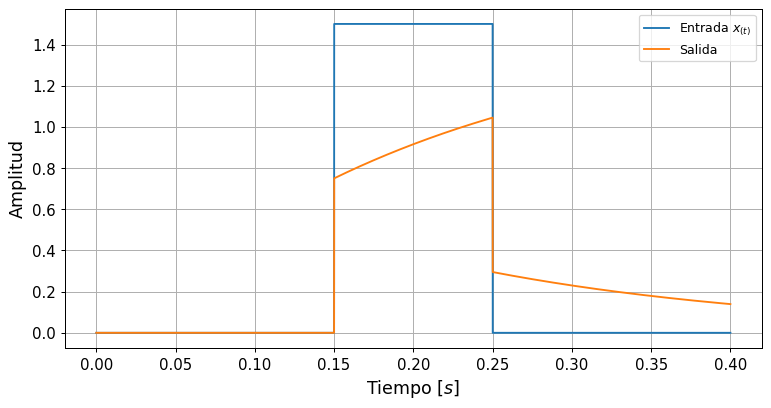

In [ ]:
input_ = pulso #se muestra la señal de entrada o x(t)

_,salida_,_ = lti_system.output(input_, t) #obtenemos la salida a traves de la funcion LTI entre la entrada del pulso 
                                           #y la funcion de transferencia obtenida 
plt.figure(figsize=(10, 5), dpi=90)#Se grafica la salida en el tiempo
plt.plot(t, input_, label='Entrada $x_{(t)}$')
plt.plot(t, salida_, label='Salida')

plt.legend()
plt.grid(True)
plt.xlabel('Tiempo [$s$]')
plt.ylabel('Amplitud')


#### Salida en frecuencia Y(w)

In [ ]:
Fs = 1000
sa1=salida_
t = np.linspace(0,.4,1000)

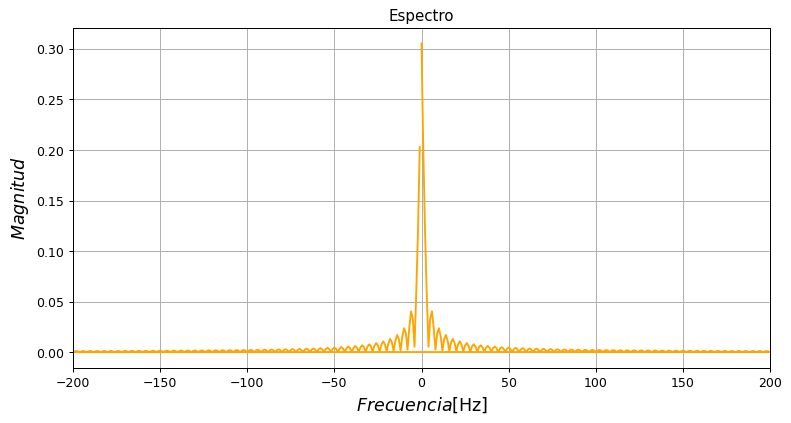

In [ ]:
vf1 = np.fft.fftfreq(len(sa1),1/Fs) #calculo vector de frecuencias
fftsa1 = np.fft.fft(sa1) #cálculo FFT
plt.figure(figsize=(10,5), dpi=(90))
plt.plot(vf1,abs(fftsa1)/len(vf1),'orange')
plt.title(r'Espectro')
plt.xlabel(r'$Frecuencia$[Hz]',fontsize = 14)
plt.ylabel(r'$Magnitud$',fontsize = 14)
plt.xlim(-200,200)
plt.grid(True)
plt.show()

## 9. Modular la salida del sistema en cada una de las modulaciones vistas en clase (representar la señal modulada en el tiempo y hallar su espectro)

Variables

In [ ]:
Ac=1
Fc=150
t = np.linspace(0,1,10000)
Wc=2* np.pi *Fc
m1= 1
inf=salida_ 

### Portadora

Para las modulaciones realizamos una señal portadora cosenoidal ya que esta es par.

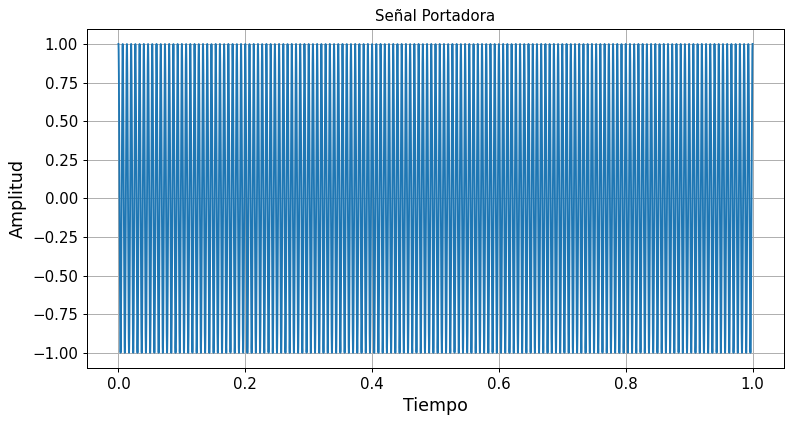

In [ ]:
plt.figure(figsize=(10, 5), dpi=90)
portadora = Ac*np.cos(Wc* t) #Señal coseno 

plt.plot(t, portadora, '-')# grafica de la señal coseno
plt.title('Señal Portadora')
plt.ylabel('Amplitud')
plt.xlabel('Tiempo')
plt.grid(True)

plt.show()

###  AM

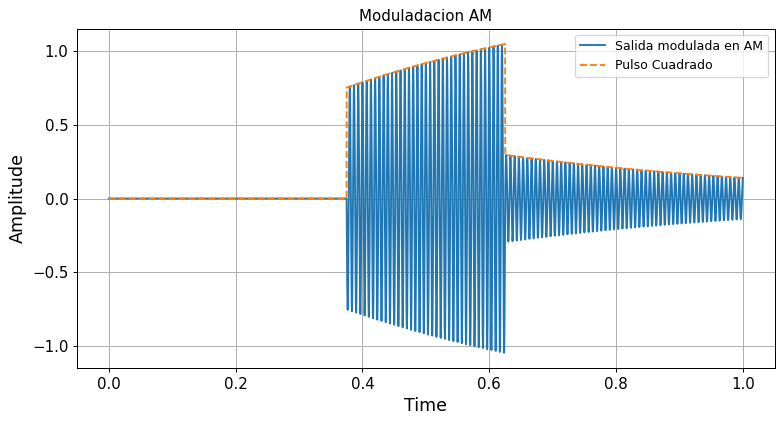

In [ ]:
AM  = (inf- min(inf))*portadora   #tomamos la formula de modulacion AM donde a la señal de entrada 
                                  #se le resta el min de la misma señal y se multiplica por la portadora 
plt.figure(figsize=(10, 5), dpi=90) # grafica de la modulacion AM
plt.plot(t, AM,label=f'Salida modulada en AM')
plt.plot(t, (inf- min(inf)), '--', label= 'Pulso Cuadrado')
#plt.plot(t, portadora,label="señal portadora")

plt.title('Moduladacion AM')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.grid(True)
plt.legend()
plt.show()

#### Espectro:

No handles with labels found to put in legend.


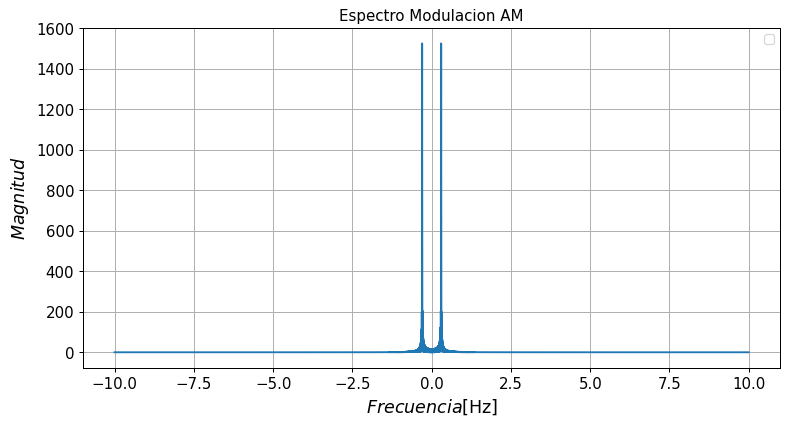

In [ ]:
AM_w = fftshift(np.abs(fft(AM)))

w=fftshift(fftfreq(AM_w.shape[0], t[500]-t[0]))#realizamos la tranformada de fourier para encontrar el espectro de la modulación
plt.figure(figsize=(10,5 ), dpi=90)
plt.title(r'Espectro Modulacion AM')
plt.xlabel(r'$Frecuencia$[Hz]',fontsize = 14)
plt.ylabel(r'$Magnitud$',fontsize = 14)
plt.plot(w, AM_w)
plt.legend()

plt.grid(True)

Como podemos observar se duplica la misma informacion, lo que implica una mayor perdida de energia.

### FM

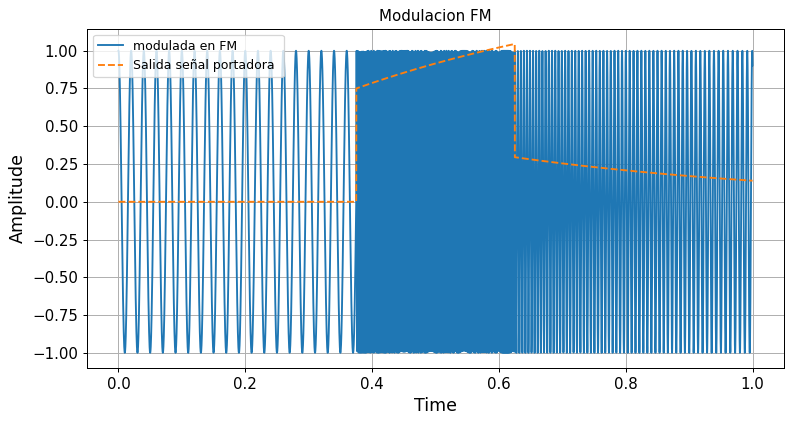

In [ ]:
Beta = 0.7 #utilizamos un beta del orden de las decenas para casos reales 
Fc=50
Wc=2* np.pi *Fc
Fm=10
#FM = Ac*np.cos((Wc)+Beta*np.sin(2*np.pi*Fm*t))
FM =  np.cos((Wc* t) + Beta * cumtrapz(inf*5e3, t, initial=0)) #realizamos la ecuacion de la modulacion FM
plt.figure(figsize=(10, 5), dpi=90)
plt.plot(t, FM,label="modulada en FM")#grafica de la modulacion FM
plt.plot(t, inf, '--',label="Salida señal portadora ")
#plt.plot(t,portadora)

plt.title('Modulacion FM')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.grid(True)
plt.legend()
plt.show()

Espectro

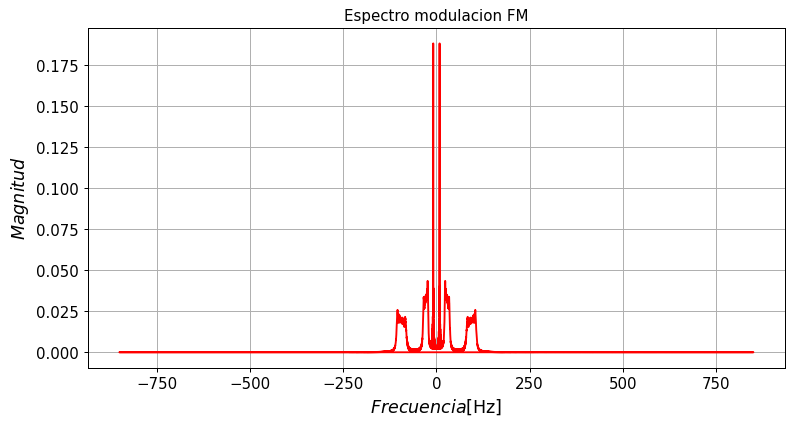

In [ ]:
Fs=1700
spam=FM
vfam = np.fft.fftfreq(len(spam),1/Fs) #calculo vector de frecuencias
fftsam = np.fft.fft(spam) #cálculo FFT
plt.figure(figsize=(10,5), dpi=90)
plt.plot(vfam,abs(fftsam)/len(vfam),'r')
#plt.stem(vfam,abs(fftsam)/len(vfam),'b')
plt.title(r'Espectro modulacion FM')
plt.xlabel(r'$Frecuencia$[Hz]',fontsize = 14)
plt.ylabel(r'$Magnitud$',fontsize = 14)
#plt.xlim(-150,150)
plt.grid(True)
plt.show()

### DSB

La modulacion DSB consiste en modificar la amplitud de la señal de entrada en función de las variaciones de la señal de portadora. La modulación en doble banda lateral equivale a una modulación AM, pero sin reinserción de la portadora.

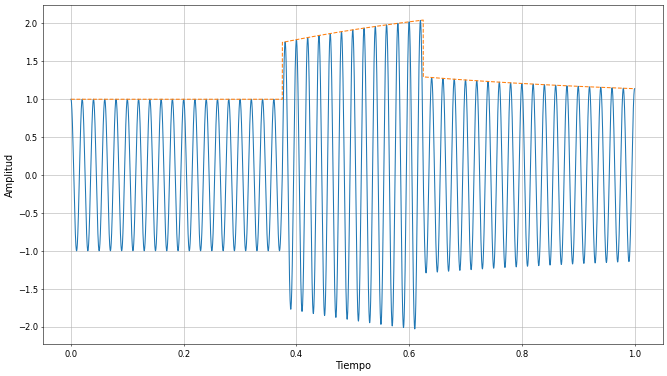

In [ ]:
DSB= Ac* np.cos(Wc*t)+ m1 * inf * Ac * np.cos(Wc*t)
plt.figure(figsize=(16, 9), dpi=50)
plt.plot(t, DSB, '-')
plt.plot(t, salida_+1, '--')
#plt.plot(t, portadora)
plt.ylabel('Amplitud')
plt.xlabel('Tiempo')
plt.grid(True)

plt.show()

Espectro

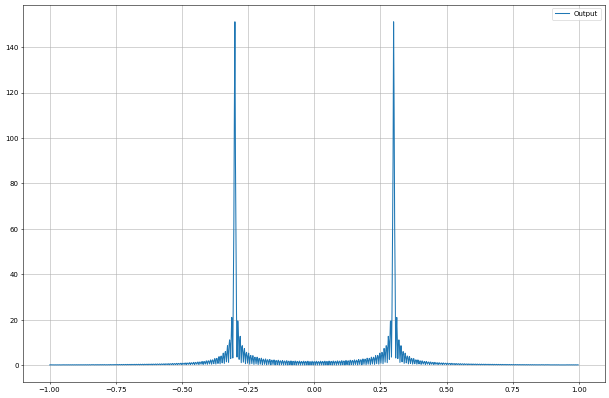

In [ ]:
DSB_w = fftshift(np.abs(fft(AM)))
w=fftshift(fftfreq(DSB_w.shape[0], t[500]-t[0]))#realizamos la tranformada de fourier para encontrar el espectro de la modulación
plt.figure(figsize=(15, 10), dpi=50)
plt.plot(w, DSB_w,label="Output")
plt.legend()
#plt.xlim(-30, 30)
plt.grid(True)

### SSB +

Para SSB se necesita una nueva portadora desfasada 90 grados y se suma o se resta la transformada de Hilbert de la señal moduladora multiplicada por esta portadora nueva.

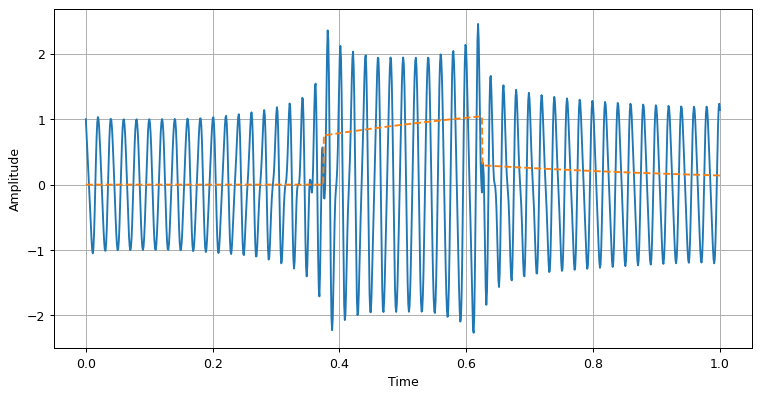

In [ ]:
Hinf=hilbert(inf).imag #Transformada de Hilbert
portadora2 = np.cos(2 * np.pi *100 * t+np.pi/2)
SSBp=DSB+Ac*Hinf*portadora2

plt.figure(figsize=(10, 5), dpi=90)
plt.plot(t,SSBp,'-')
plt.plot(t, salida_, '--')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.grid(True)

plt.show()

Espectro

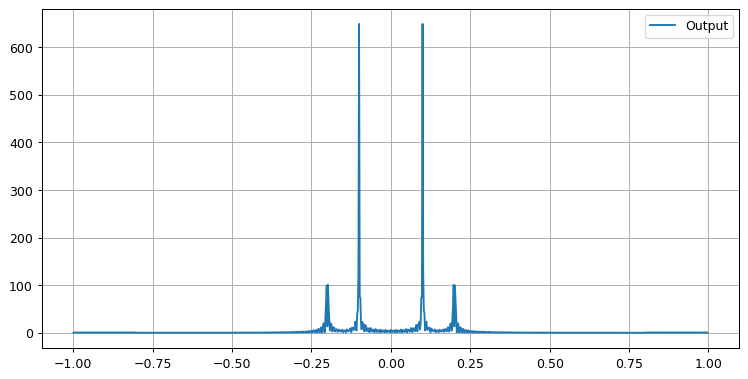

In [ ]:
SSB_w = fftshift(np.abs(fft(SSBp)))
w=fftshift(fftfreq(SSB_w.shape[0], t[500]-t[0]))#realizamos la tranformada de fourier para encontrar el espectro de la modulación
plt.figure(figsize=(10, 5), dpi=90)
plt.plot(w, SSB_w,label="Output")
plt.legend()
#plt.xlim(-30, 30)
plt.grid(True)

### SSB-

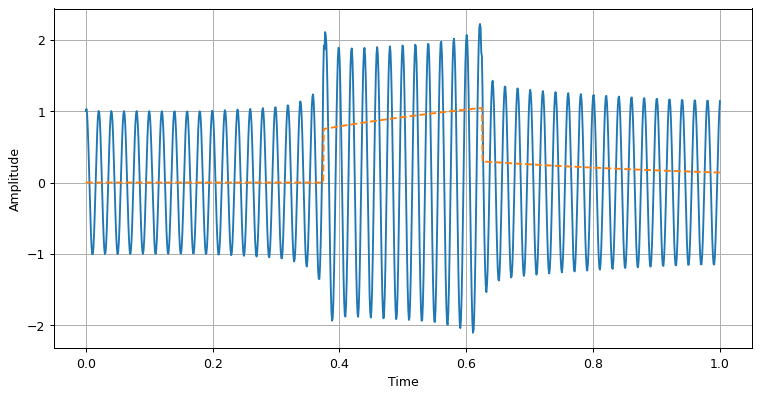

In [ ]:
Hinf=hilbert(inf).imag #Transformada de Hilbert
portadora2 = np.cos(2 * np.pi *50 * t+np.pi/2 )
SSBl=DSB-Ac*Hinf*portadora2

plt.figure(figsize=(10, 5), dpi=90)
plt.plot(t,SSBl,'-')
plt.plot(t, salida_, '--')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.grid(True)

plt.show()

Espectro

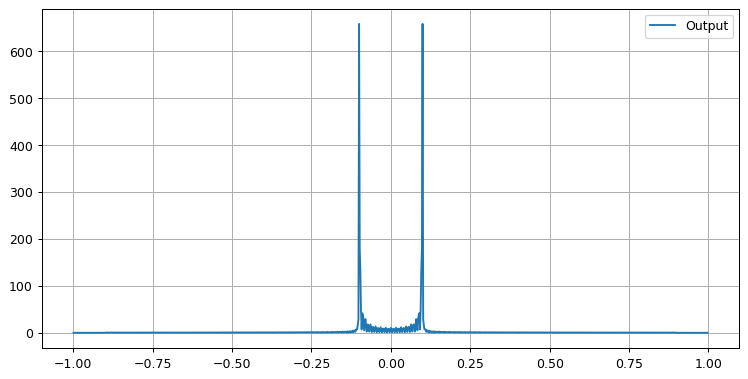

In [ ]:
SSB_w = fftshift(np.abs(fft(SSBl)))
w=fftshift(fftfreq(SSB_w.shape[0], t[500]-t[0]))#realizamos la tranformada de fourier para encontrar el espectro de la modulación
plt.figure(figsize=(10, 5), dpi=90)
plt.plot(w, SSB_w,label="Output")
plt.legend()
#plt.xlim(-30, 30)
plt.grid(True)

### VSB

En este caso, una de las bandas laterales se transmite casi completamente mientras que para la otra solo se transmite una parte o vestigio de ella

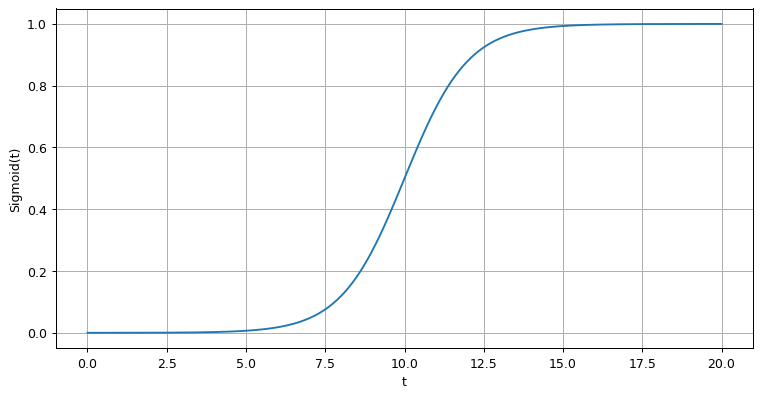

In [ ]:
# Se crea un filtro vestigial para filtrar la señal DSB
x = np.linspace(0, 20, 1000)
z = 1/(1 + np.exp(-x+10)) 

plt.figure(figsize=(10, 5), dpi=90)
plt.plot(x, z) 
plt.xlabel("t") 
plt.ylabel("Sigmoid(t)") 
plt.grid(True)  
plt.show()

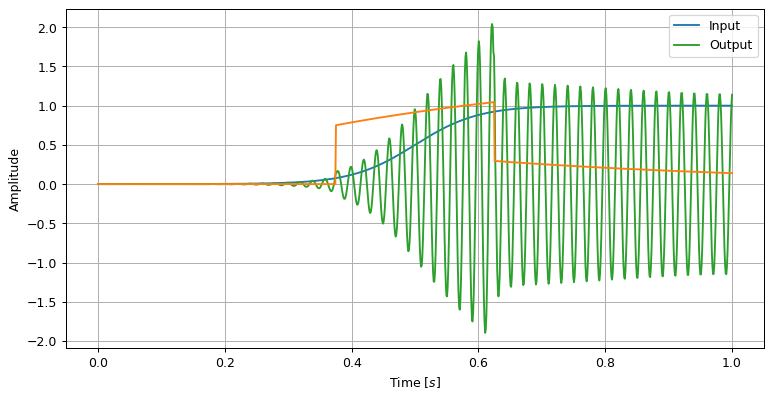

In [ ]:
input_ = z #se muestra la señal de entrada
output_= input_*SSBl
plt.figure(figsize=(10, 5), dpi=90)#Se grafica la salida en el tiempo
plt.plot(t, input_, label='Input')
plt.plot(t, output_, label='Output', color='C2')
plt.plot(t, salida_)
plt.legend()
plt.grid(True)
plt.xlabel('Time [$s$]')
plt.ylabel('Amplitude')
VSB=output_

Espectro

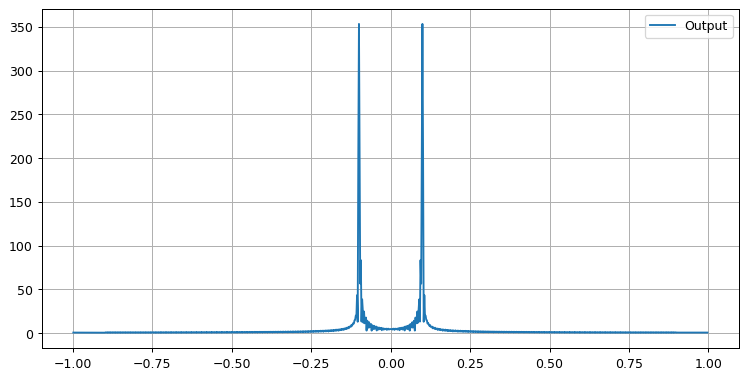

In [ ]:
VSB_w = fftshift(np.abs(fft(VSB)))
w=fftshift(fftfreq(VSB_w.shape[0], t[500]-t[0]))#realizamos la tranformada de fourier para encontrar el espectro de la modulación
plt.figure(figsize=(10, 5), dpi=90)
plt.plot(w, VSB_w,label="Output")
plt.legend()
#plt.xlim(700, 900)
plt.grid(True)

### Narrow Band

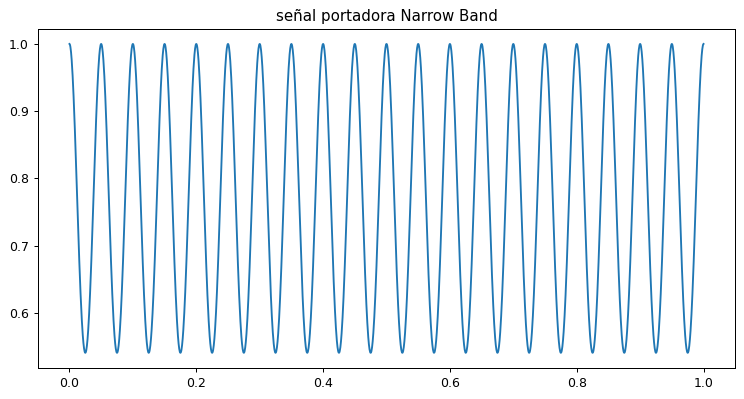

In [ ]:
Ac=1
Beta=1
Fm=10
t = np.linspace(0,1,2000)
fnb=Ac*np.cos(Beta*np.sin(2*np.pi*Fm*t))
plt.figure(figsize=(10,5), dpi=90)
plt.title('señal portadora Narrow Band')
plt.plot(t,fnb)

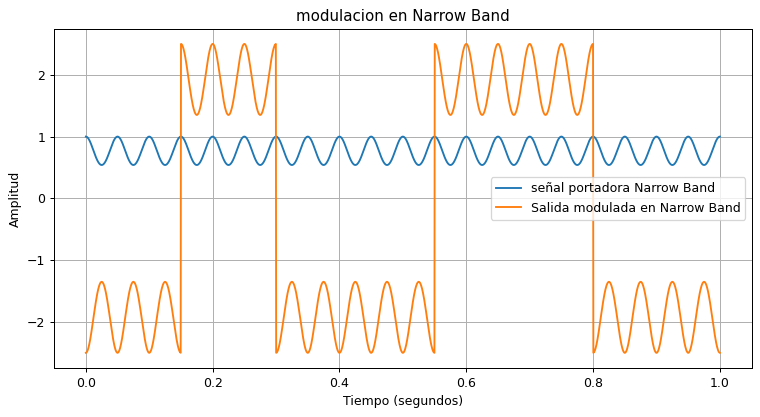

In [ ]:
svnb=sa*fnb
plt.figure(figsize=(10,5),dpi=90)
plt.title('modulacion en Narrow Band')
plt.plot(t,fnb,label="señal portadora Narrow Band")
plt.plot(t,svnb,label="Salida modulada en Narrow Band")
plt.legend()
plt.xlabel("Tiempo (segundos)")
plt.ylabel("Amplitud")
plt.grid()

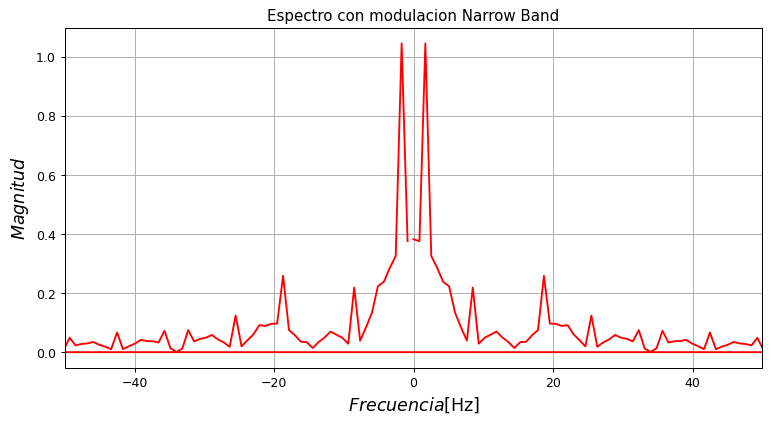

In [ ]:
Fs=1700
spnb=svnb
vfnb = np.fft.fftfreq(len(spnb),1/Fs) #calculo vector de frecuencias
fftsavnb = np.fft.fft(spnb) #cálculo FFT
plt.figure(figsize=(10,5), dpi=90)
plt.plot(vfnb,abs(fftsavnb)/len(vfnb),'r')
#plt.stem(vfnb,abs(fftsavnb)/len(vfnb),'b')
plt.title(r'Espectro con modulacion Narrow Band')
plt.xlabel(r'$Frecuencia$[Hz]',fontsize = 14)
plt.ylabel(r'$Magnitud$',fontsize = 14)
plt.xlim(-50,50)
plt.grid(True)
plt.show()

### Para las modulaciones PAM,PWM y PPM se realiza un tren de pulsos como señal portadora 

Se realiza la funcion tren de pulsos 

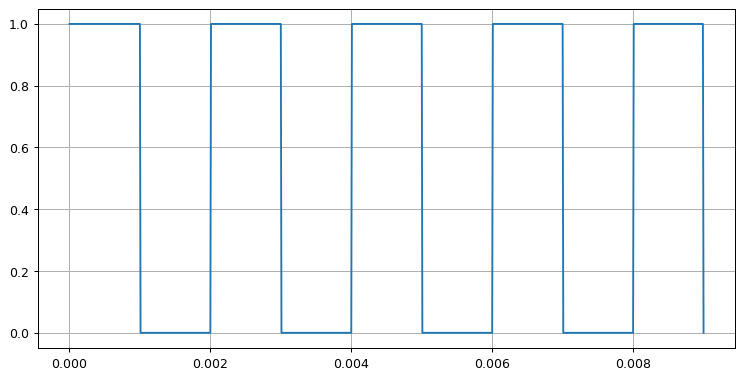

In [ ]:
t = np.linspace(0, 0.009, 1000)#asignamos el tiempo en el que vive y la cani¿tidad de muestras con las que se 
u1=np.piecewise(t,t>=0.002,[1,0])# se realizan dos escalones unitarios para la señal rectangular
u2=np.piecewise(t,t>=0.006,[1,0])
u = u1-u2 #se restan ambos escalones para representar la señal 
tr1=np.piecewise(t,t>=0.000,[1,0])
tr2=np.piecewise(t,t>=0.001,[1,0])
tr3=np.piecewise(t,t>=0.002,[1,0])
tr4=np.piecewise(t,t>=0.003,[1,0])
tr5=np.piecewise(t,t>=0.004,[1,0])
tr6=np.piecewise(t,t>=0.005,[1,0])
tr7=np.piecewise(t,t>=0.006,[1,0])
tr8=np.piecewise(t,t>=0.007,[1,0])
tr9=np.piecewise(t,t>=0.008,[1,0])
tr10=np.piecewise(t,t>=0.009,[1,0])
tren = tr1-tr2+tr3-tr4+tr5-tr6+tr7-tr8+tr9-tr10
plt.figure(figsize=(10, 5), dpi=90)
plt.grid(True)
plt.plot(t, tren)

### PAM

la modulacion PAM es una técnica de modulación de señales analógicas donde el desfase y la frecuencia de la señal quedan fijas y la amplitud es la que varía.

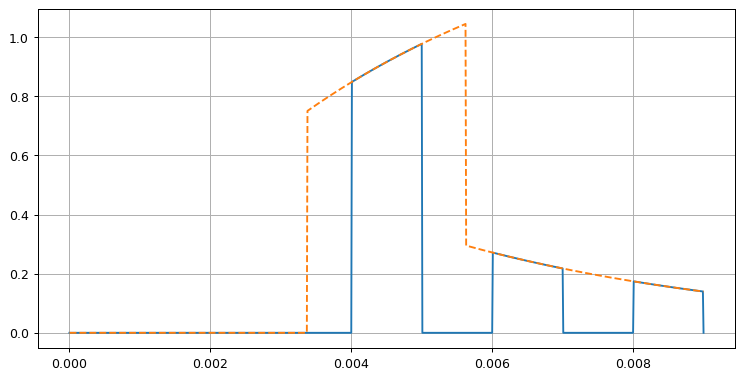

In [ ]:
PAM= inf*tren #multiplicamos la señal de netrada por el tren de pulsos para generar la modulacion 
plt.figure(figsize=(10, 5), dpi=90) 
plt.grid(True)
plt.plot(t,PAM)#grafia de la señal
plt.plot(t, inf, '--')

Espectro

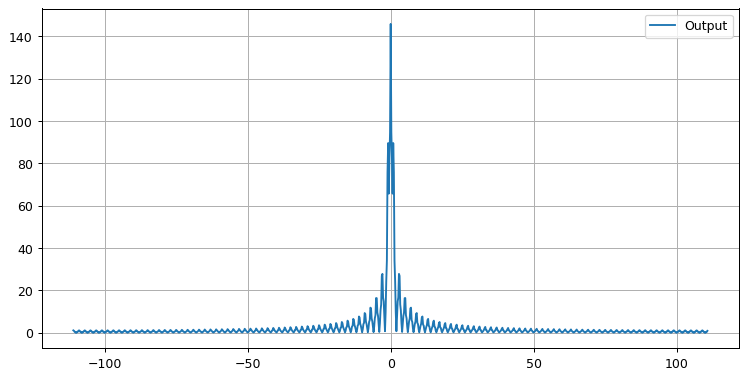

In [ ]:
PAM_w = fftshift(np.abs(fft(PAM)))
w=fftshift(fftfreq(PAM_w.shape[0], t[500]-t[0]))#realizamos la tranformada de fourier para encontrar el espectro de la modulación
plt.figure(figsize=(10, 5), dpi=90)
plt.plot(w, PAM_w,label="Output")
plt.legend()
#plt.xlim(-50, 50)
plt.grid(True)

### PWM

modulación PWM los valores
muestreados de la señal moduladora x(t ) se emplean para variar la duración de los pulsos individuales
de la señal portadora

In [ ]:
percent=30.0
TimePeriod=0.3
Cycles=7
dt=0.02
plt.figure(figsize=(10,5),dpi=90)
t=np.arange(0,Cycles*TimePeriod,dt); 
#pwm= t%TimePeriod<2.3*TimePeriod*percent/100
pwm = tren
plt.title('PWM')
plt.plot(t,pwm, label='PWM')
plt.legend()
plt.grid(True)

NameError: ignored

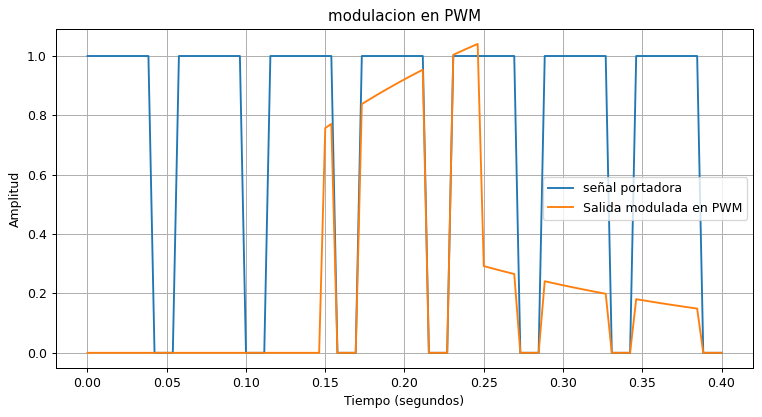

In [ ]:
t4 = np.linspace(0,.4,105)
t_2, pulso = pulse(t4)
_,output2_,_= lti_system.output(pulso, t_2)
sap=output2_
spwm=sap*pwm
plt.figure(figsize=(10,5),dpi=90)
plt.title('modulacion en PWM')
plt.plot(t4,pwm,label="señal portadora")
plt.plot(t4,spwm,label="Salida modulada en PWM")

plt.legend()
plt.xlabel("Tiempo (segundos)")
plt.ylabel("Amplitud")
plt.grid()

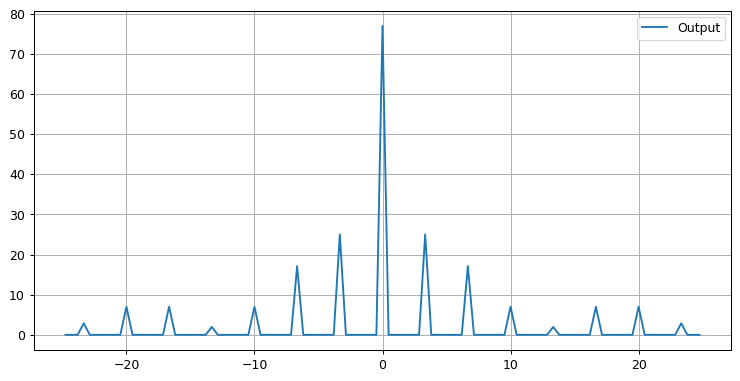

In [ ]:
YPWM = fftshift(np.abs(fft(pwm)))
w=fftshift(fftfreq(YPWM.shape[0], t[1]-t[0]))#realizamos la tranformada de fourier para encontrar el espectro de la modulación
plt.figure(figsize=(10, 5), dpi=90)
plt.plot(w,YPWM,label="Output")
plt.legend()

plt.grid(True)

### PPM

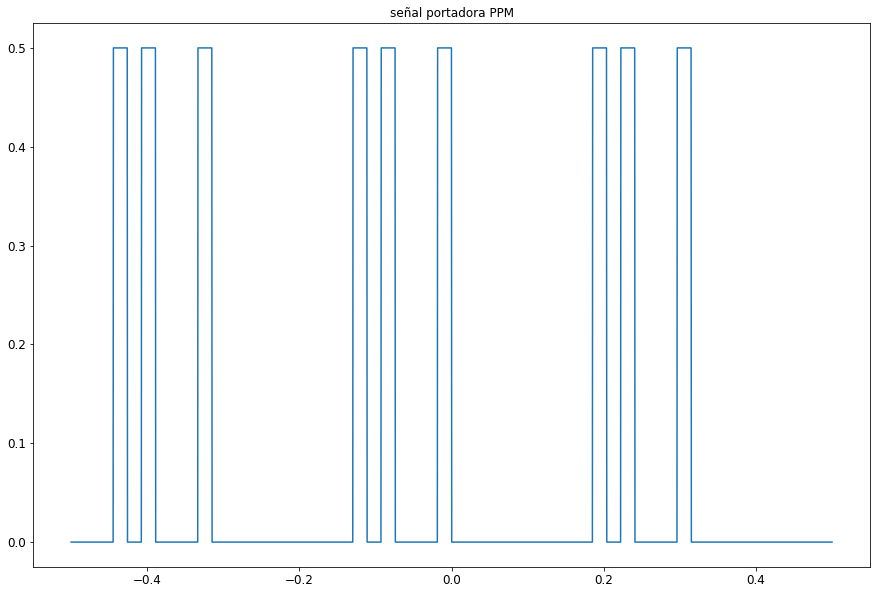

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

A = 0.5
T = 1 #5 segundos de grafica
Fs = 2700 # 500 muestras por segundo Ajustar según señal estudiada
Nm = T*Fs #numero de muestras requeridas
tv = np.linspace(-T/2,T/2,Nm)

ppm = np.concatenate((-0*A*np.ones(int(150)),A*np.ones(int(50)),-0*A*np.ones(int(50)), A*np.ones(int(50)), -0*A*np.ones(int(150)), (A*np.ones(int(50))),-0*A*np.ones(int(500)),A*np.ones(int(50)),(-0*A*np.ones(int(50))),(A*np.ones(int(50))),(-0*A*np.ones(int(150))),A*np.ones(int(50)), -0*A*np.ones(int(500)), A*np.ones(int(50)), -0*A*np.ones(int(50)),A*np.ones(int(50)),-0*A*np.ones(int(150)), A*np.ones(int(50)),-0*A*np.ones(int(500)), ), axis=0)
plt.figure(figsize=(15,10))
plt.title('señal portadora PPM')
plt.plot(tv,ppm)

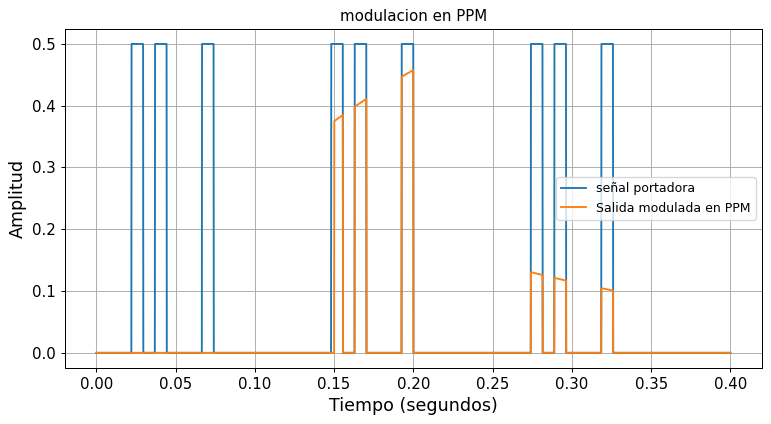

In [ ]:
t3 = np.linspace(0,.4,2700)
t_3, pulso = pulse(t3)
_,output3_,_= lti_system.output(pulso, t_3)
salpo=output3_
sppm=salpo*ppm
plt.figure(figsize=(10,5),dpi=90)
plt.title('modulacion en PPM')
plt.plot(t3,ppm,label="señal portadora")
plt.plot(t3,sppm,label="Salida modulada en PPM")
plt.legend()
plt.xlabel("Tiempo (segundos)")
plt.ylabel("Amplitud")
plt.grid()

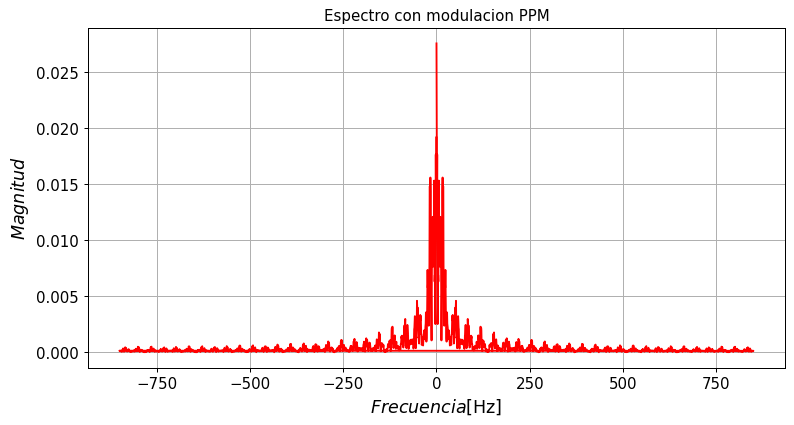

In [ ]:
Fs=1700
vfpm = np.fft.fftfreq(len(sppm),1/Fs) #calculo vector de frecuencias
fftsapm = np.fft.fft(sppm) #cálculo FFT
plt.figure(figsize=(10,5), dpi=90)
plt.plot(vfpm,abs(fftsapm)/len(vfpm),'r')
#plt.stem(vfpm,abs(fftsapm)/len(vfpm),'b')
plt.title(r'Espectro con modulacion PPM')
plt.xlabel(r'$Frecuencia$[Hz]',fontsize = 14)
plt.ylabel(r'$Magnitud$',fontsize = 14)
#plt.xlim(-60,60)
plt.grid(True)
plt.show()

## Segunda Parte


###Usando el mismo sistema LTI desarrollado en el Taller-1 hallar, para cada señal de entrada
1. El ancho de banda del sistema. (Diagrama de bode)
2. La Cross-correlacion entre la entrada y la salida del sistema LTI
3. La densidad espectral de potencia de la entrada y en cada etapa /a la salida del sistema LTI, del modulador y del demodulador

Se van a trabajar con 3 señales diferentes: 1) Pulso cuadrado. 2) Ruido blanco Gaussiano. 3) Pulso Cuadrado con ruido blanco gaussiano

Nota
-No intenten modular el ruido blanco Gaussiano
-Usar unicamente modulacion AM, FM, PWM
-Implementar los demoduladores y comparar la señal de entrada con la salida del demodulador

In [ ]:
import numpy as np
from scipy.signal import lti, convolve, hilbert, unit_impulse, correlate
from matplotlib import pyplot as plt
from scipy.fftpack import fft, fftfreq, fftshift, ifft
from ipywidgets import interact
from scipy.integrate import cumtrapz
from scipy.misc import derivative

### 1. Ancho de banda del sistema (Diagrama de bode)

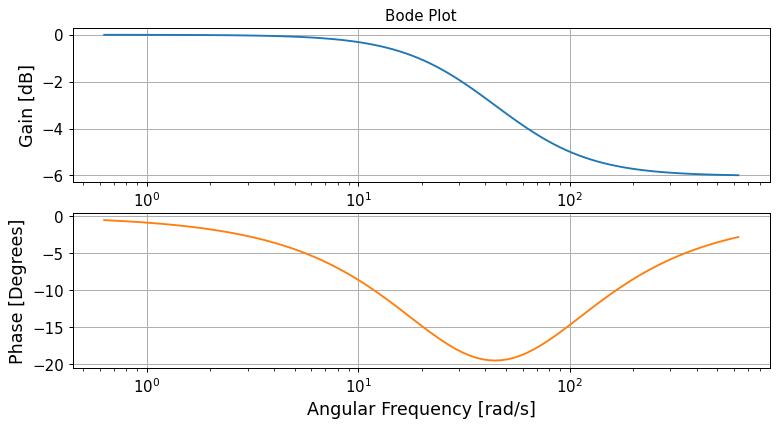

In [ ]:
lti_system = lti(num,den)

w, mag, phase = lti_system.bode()    #system.bode devuelve la frecuencia, la magnitud y la fase
w =  2*np.pi*w    # Para pasar a rad/s

plt.figure(figsize=(10, 5), dpi=90)

# Diagrama de amplitud

plt.subplot(211)
plt.title('Bode Plot')
plt.ylabel('Gain [dB]')
plt.semilogx(w, mag)
plt.grid(True)

# Diagrama de fase

plt.subplot(212)
plt.semilogx(w, phase, color='C1')
plt.ylabel('Phase [Degrees]')
plt.xlabel('Angular Frequency [rad/s]')
plt.grid(True)

### Ruido blanco Gaussiano

El ruido blanco Gaussiano es una señal aleatoria, caracterizada porque sus valores en instantes de tiempo distintos no tienen relación alguna entre sí, es decir, no existe correlación estadística entre sus valores. Por tanto es un proceso ergodico.

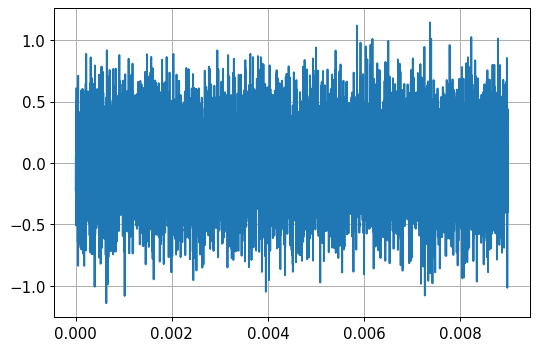

In [ ]:
t = np.linspace(0, 0.009, 10000)
ruido = np.random.normal(0, np.sqrt(0.1), 10000)
plt.figure(figsize=(15,10), dpi=90)# se grafica el pulso rectangular
plt.subplot(221)
plt.plot(t, ruido)
plt.grid(True)

#plt.subplot(222)
#plt.hist(ruido, 50, color='C1')
#plt.grid(True)
#plt.show()

### Media y Varianza Ruido Blanco Gaussiano

In [ ]:
mean=np.mean(ruido)
var=np.var(ruido)
mean,var

(-0.003645955217058362, 0.09879094830274557)

### Pulso cuadrado mas ruido blanco gaussiano

Text(0, 0.5, 'Amplitude')

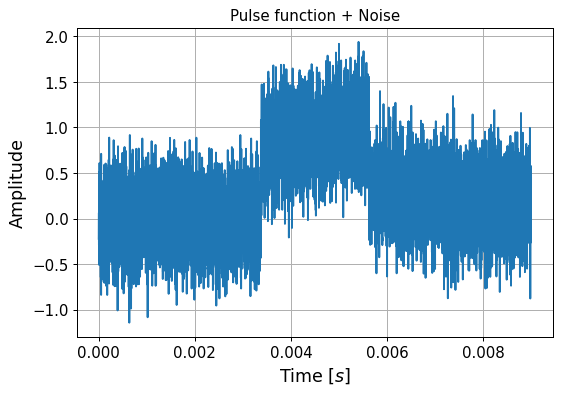

In [ ]:
pruido=salida_+ruido
plt.figure(figsize=(15,10), dpi=90)# se grafica el pulso rectangular mas ruido
plt.subplot(221)
plt.plot(t,pruido)
plt.grid(True)
plt.title("Pulse function + Noise")
plt.xlabel("Time [$s$]")
plt.ylabel("Amplitude")

#plt.subplot(222)
#A1, A2, _ = plt.hist(pruido, bins=np.arange(-0.5, 1.5, 0.1), color='C1')
#plt.grid(True)
#plt.show()

### Media y Varianza De la Salida

In [ ]:
_,output1_,_ = lti_system.output(salida_, t) #obtenemos la salida a traves de la funcion LTI entre la entrada del pulso 
meanout1=np.mean(output1_)
varout1=np.var(output1_)
meanout1,varout1

(0.15553995573150473, 0.033290481451885685)

### Salida con pulso cuadrado y ruido blanco Gaussiano

Text(0, 0.5, 'Amplitude')

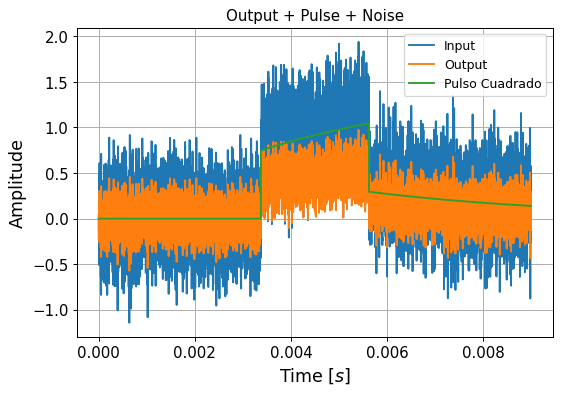

In [ ]:
input_ = salida_+ruido#se muestra la señal de entrada o x(t)

_,output_,_ = lti_system.output(input_, t) #obtenemos la salida a traves de la funcion LTI entre la entrada del pulso 
#y la funcion de transferencia obtenida 
plt.figure(figsize=(15, 10), dpi=90)#Se grafica la salida en el tiempo
plt.subplot(223)
plt.plot(t, input_, label='Input')
plt.plot(t, output_, label='Output')
plt.plot(t, salida_, label='Pulso Cuadrado')
plt.legend()
plt.grid(True)
plt.title('Output + Pulse + Noise')
plt.xlabel('Time [$s$]')
plt.ylabel('Amplitude')

#plt.xlim(0, 0.009)
#plt.subplot(224)
#B1, B2, _ = plt.hist(output_, bins=np.arange(-0.5, 1.5, 0.1), color='C1' )
#plt.grid(True)
##plt.hist(output_, 10, range=[-1, 1], color='C1' )

### Modulacion y Demodulacion AM

Text(0.5, 1.0, 'Comparacion señales')

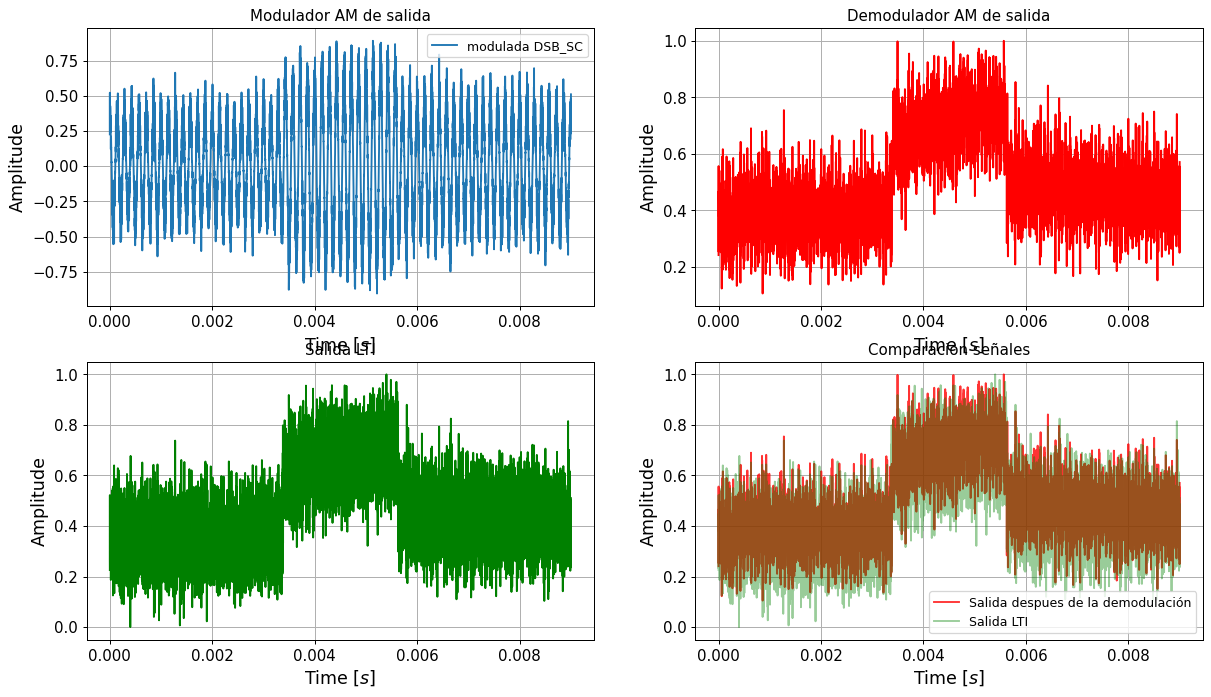

In [ ]:
t = np.linspace(0, 0.009, 10000)
ruido = np.random.normal(0, np.sqrt(0.01), 10000)
ruido3 = np.random.normal(0, np.sqrt(0.1), 10000)
u1=np.piecewise(t,t>=0.002,[1,0])# se realizan dos escalones unitarios para la señal rectangular
u2=np.piecewise(t,t>=0.006,[1,0])
u = u1-u2 #se restan ambos escalones para representar la señal

input_ = u+ruido#se muestra la señal de entrada o x(t)
input3_ = u+ruido3

#_,output0_,_ = lti_system.output(input_, t) #salida

output0_ = output_
output0_n = (output0_- output0_.min())/(output0_.max() - output0_.min())#normalizar la señal 

_,output3_,_ = lti_system.output(input3_, t) #salida
output3_n = (output3_- output3_.min())/(output3_.max() - output3_.min())

portadora = np.cos(2 * np.pi *7000 * t) #Señal coseno 

# Modulation DSB_SC

moduladaDSB_SC = output0_n*portadora                               #Modulacion AM DSB_SC de la salida de SLIT
#demodulation
envelope = abs(hilbert(moduladaDSB_SC)) #Se realiza la deteccion de la envolvente con la transformada de hilbert
envelope2=envelope/max(envelope)  

moduladaDSB_SC3 = output3_n*portadora                               #Modulacion AM DSB_SC de la salida de SLIT
#demodulation
envelope0 = abs(hilbert(moduladaDSB_SC3)) #Se realiza la deteccion de la envolvente con la transformada de hilbert
envelope3=envelope0/max(envelope0)  

fig = plt.figure(figsize=(16, 9), dpi=90)
plt.subplot(221)
plt.plot(t,moduladaDSB_SC, label = 'modulada DSB_SC')
plt.grid(True)
plt.legend(loc = 1)
plt.xlabel('Time [$s$]')
plt.ylabel('Amplitude')
plt.title('Modulador AM de salida')
    
    
plt.subplot(222)
plt.plot(t,envelope2, color = 'red')
plt.grid(True)
plt.xlabel('Time [$s$]')
plt.ylabel('Amplitude')
plt.title('Demodulador AM de salida')

plt.subplot(223)
plt.plot(t,output0_n, color = 'green')
plt.grid(True)
plt.xlabel('Time [$s$]')
plt.ylabel('Amplitude')
plt.title('Salida LTI')

plt.subplot(224)
plt.plot(t,envelope2, color = 'red', alpha= 0.8,label='Salida despues de la demodulación')
plt.plot(t,output0_n, color = 'green',alpha= 0.4,label='Salida LTI')
#plt.plot(t,output_, color = 'blue',alpha= 0.4,label='Salida LTI')
plt.legend()
plt.grid(True)
plt.xlabel('Time [$s$]')
plt.ylabel('Amplitude')
plt.title('Comparacion señales')

### Funcion de correlacion AM

Text(0.5, 1.0, 'Funcion de CrossCorrelacion del pulso mas el ruido y demodulada')

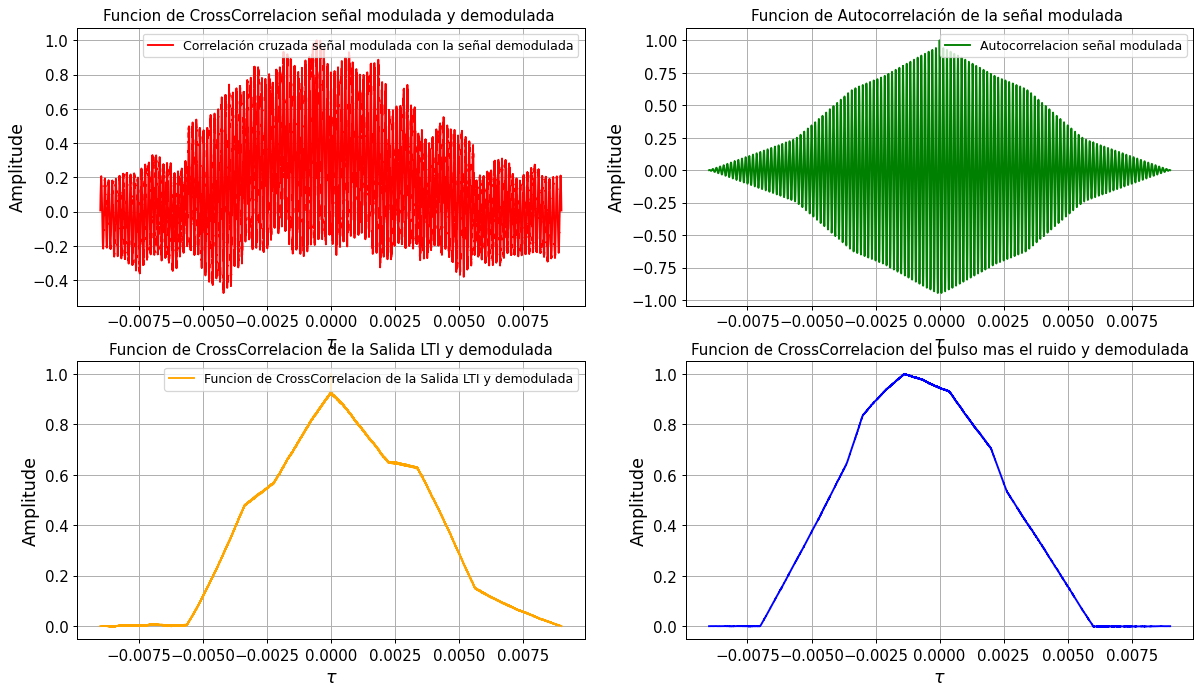

In [ ]:
R_yx11 = correlate(moduladaDSB_SC, envelope2, mode='full')  # Usando la función correlate
R_y13= R_yx11/max(R_yx11) #normalizamos la funcion
t_corr3 = np.linspace(-t[-1],t[-1],R_yx11.shape[0])



R_yx114 = correlate(output_, envelope2, mode='full')  # Usando la función correlate
R_y14= R_yx114/max(R_yx114) #normalizamos la funcion
t_corr4 = np.linspace(-t[-1],t[-1],R_yx114.shape[0])


R_xx1 = correlate(moduladaDSB_SC, moduladaDSB_SC, mode='full')           #Autocorrelacion de la salida del modulador FM
R_y11= R_xx1/max(R_xx1)
t_corr1 = np.linspace(-t[-1],t[-1],R_xx1.shape[0])#Se define el vector de tiempo de la autocorrelación


pruido=u+ruido
R_yx115 = correlate(pruido, envelope2, mode='full')  # Usando la función correlate
R_y15= R_yx115/max(R_yx115) #normalizamos la funcion
t_corr5 = np.linspace(-t[-1],t[-1],R_yx115.shape[0])

fig = plt.figure(figsize=(16, 9), dpi=90)
plt.subplot(221)
plt.plot(t_corr3,R_y13,'red',label='Correlación cruzada señal modulada con la señal demodulada')
plt.legend()
plt.grid()
plt.xlabel(r'$\tau$')
plt.ylabel("Amplitude")
plt.title("Funcion de CrossCorrelacion señal modulada y demodulada ")

plt.subplot(222)
plt.plot(t_corr1,R_y11,'green',label='Autocorrelacion señal modulada')
plt.legend()
plt.grid()
plt.xlabel(r'$\tau$')
plt.ylabel("Amplitude")
plt.title("Funcion de Autocorrelación de la señal modulada ")

plt.subplot(223)
plt.plot(t_corr4,R_y14,'orange',label='Funcion de CrossCorrelacion de la Salida LTI y demodulada')
plt.legend()
plt.grid()
plt.xlabel(r'$\tau$')
plt.ylabel("Amplitude")
plt.title("Funcion de CrossCorrelacion de la Salida LTI y demodulada")

plt.subplot(224)
plt.plot(t_corr5,R_y15,'blue')
plt.grid()
plt.xlabel(r'$\tau$')
plt.ylabel("Amplitude")
plt.title("Funcion de CrossCorrelacion del pulso mas el ruido y demodulada")

### Modulacion y Democulacion FM

Text(0.5, 1.0, 'Comparacion señales')

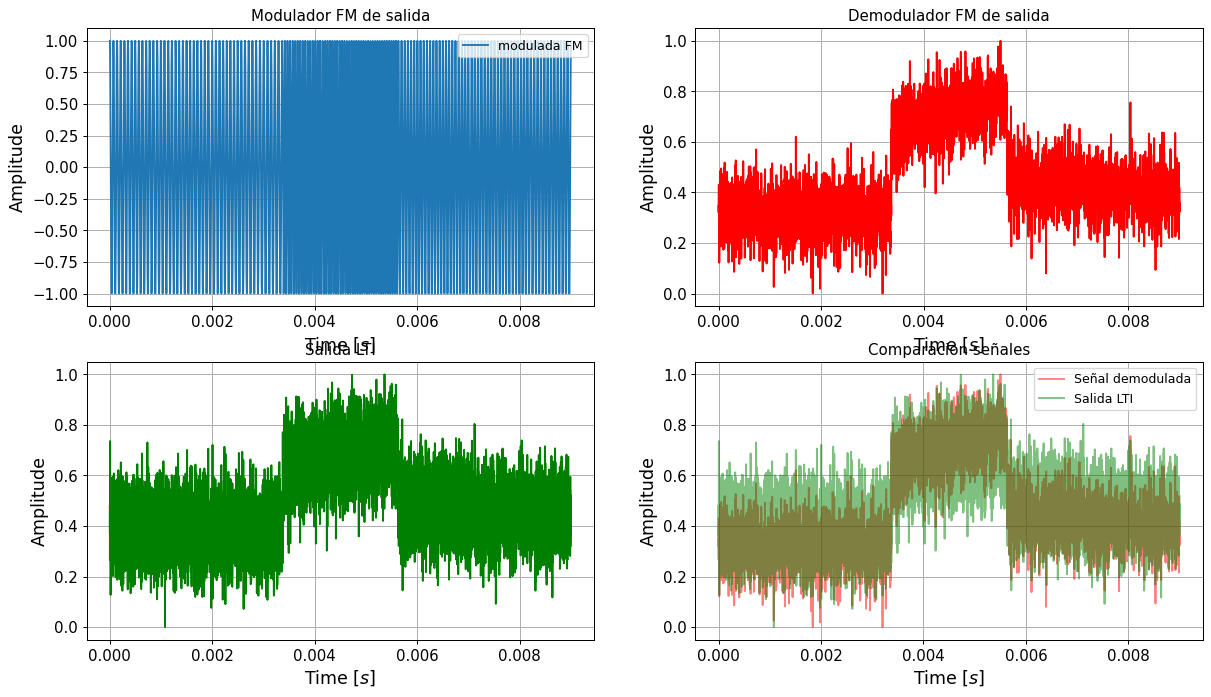

In [ ]:
t = np.linspace(0, 0.009, 10000)
ruido = np.random.normal(0, np.sqrt(0.01), 10000)
ruido2 = np.random.normal(0, np.sqrt(0.1), 10000)
u1=np.piecewise(t,t>=0.002,[1,0])# se realizan dos escalones unitarios para la señal rectangular
u2=np.piecewise(t,t>=0.006,[1,0])
u = u1-u2 #se restan ambos escalones para representar la señal

input_ = u+ruido#se muestra la señal de entrada o x(t)
input2_ = u+ruido2
input4_ = u+ruido2
input5_ = u+ruido

#_,output_,_ = lti_system.output(input_, t) #salida
output_ = (output_- output_.min())/(output_.max() - output_.min()) #normalizar la señal 

_,output2_,_ = lti_system.output(input2_, t) #salida
output2_ = (output2_- output2_.min())/(output2_.max() - output2_.min()) #normalizar la señal 

_,output4_,_ = lti_system.output(input4_, t) #salida
output4_ = (output4_- output4_.min())/(output4_.max() - output4_.min()) #normalizar la señal 

_,output5_,_ = lti_system.output(input5_, t) #salida
output5_ = (output5_- output5_.min())/(output5_.max() - output5_.min()) #normalizar la señal 


#Modulación FM
beta=40
beta3=10
Fc=4000
Wc=2* np.pi *Fc

moduladaFM =  np.cos((Wc*t) + beta * cumtrapz(output_*Fc, t, initial=0))                             
#Demodulation
diff_  = np.diff(moduladaFM)/np.diff(t)            #se deriva la señal modulada
envelope1 = abs(hilbert(diff_))       #se detecta la envolvente de la señal modulada derivada con la transformada de hilbert
envelope1 = (1/(envelope1[100:-100].max()-envelope1[100:-100].min()))*(envelope1-envelope1[100:-100].min())#se normaliza y se centra la salida del demodulador
#envelope1=envelope3/max(envelope3)    

moduladaFM2 =  np.cos((Wc*t) + beta * cumtrapz(output2_*Fc, t, initial=0))                             
#Demodulation
diff2_  = np.diff(moduladaFM2)/np.diff(t)            #se deriva la señal modulada
envelope4 = abs(hilbert(diff2_))       #se detecta la envolvente de la señal modulada derivada con la transformada de hilbert
envelope4 = (1/(envelope4[100:-100].max()-envelope4[100:-100].min()))*(envelope4-envelope4[100:-100].min())

moduladaFM3 =  np.cos((Wc*t) + beta3 * cumtrapz(output5_*Fc, t, initial=0))                             
#Demodulation
diff3_  = np.diff(moduladaFM3)/np.diff(t)            #se deriva la señal modulada
envelope13 = abs(hilbert(diff3_))       #se detecta la envolvente de la señal modulada derivada con la transformada de hilbert
envelope13 = (1/(envelope13[100:-100].max()-envelope13[100:-100].min()))*(envelope13-envelope13[100:-100].min())

moduladaFM4 =  np.cos((Wc*t) + beta3 * cumtrapz(output4_*Fc, t, initial=0))                             
#Demodulation
diff4_  = np.diff(moduladaFM4)/np.diff(t)            #se deriva la señal modulada
envelope14 = abs(hilbert(diff4_))       #se detecta la envolvente de la señal modulada derivada con la transformada de hilbert
envelope14 = (1/(envelope14[100:-100].max()-envelope14[100:-100].min()))*(envelope14-envelope14[100:-100].min())

fig = plt.figure(figsize=(16, 9), dpi=90)
plt.subplot(221)
plt.plot(t, moduladaFM, label = 'modulada FM')
plt.grid(True)
plt.legend(loc=1)
plt.ylabel("Amplitude")
plt.xlabel('Time [$s$]')
plt.title('Modulador FM de salida')


plt.subplot(222)
plt.plot(t[:-1], envelope1, color = 'red', label = 'Señal demodulada')
plt.grid(True)
plt.xlabel('Time [$s$]')
plt.ylabel('Amplitude')
plt.title('Demodulador FM de salida')

plt.subplot(223)
plt.plot(t,output_, color = 'green')
plt.grid(True)
plt.xlabel('Time [$s$]')
plt.ylabel('Amplitude')
plt.title('Salida LTI')


plt.subplot(224)
plt.plot(t[:-1], envelope1, color = 'red', alpha= 0.5, label = 'Señal demodulada')
plt.plot(t, output_, color = 'green', alpha= 0.5, label = 'Salida LTI')
plt.legend()
plt.grid(True)
plt.xlabel('Time [$s$]')
plt.ylabel('Amplitude')
plt.title('Comparacion señales')

### Fucion de correlacion FM

Text(0.5, 1.0, 'Funcion de CrossCorrelacion del pulso mas el ruido y demodulada')

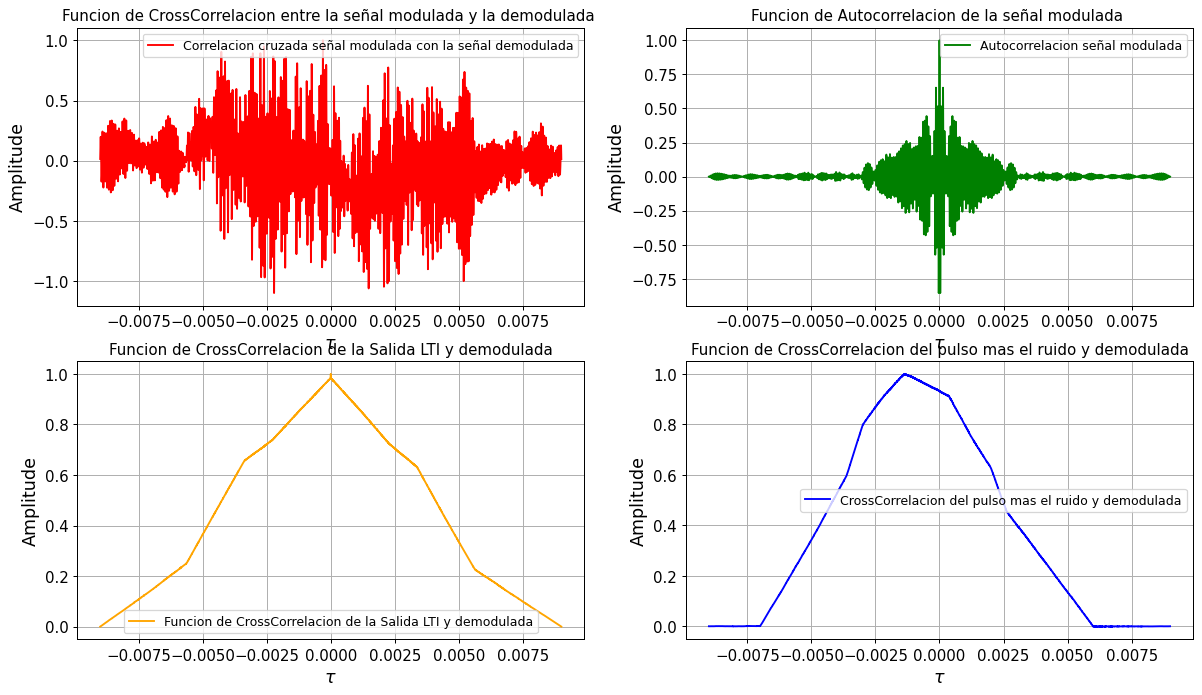

In [ ]:
R_yx11 = correlate(moduladaFM[:-1], envelope1, mode='full')  # Usando la función correlate
R_y13= R_yx11/max(R_yx11) #normalizamos la funcion
t_corr3 = np.linspace(-t[-1],t[-1],R_yx11.shape[0])



R_yx114 = correlate(output_, envelope1, mode='full')  # Usando la función correlate
R_y14= R_yx114/max(R_yx114) #normalizamos la funcion
t_corr4 = np.linspace(-t[-1],t[-1],R_yx114.shape[0])


R_xx1 = correlate(moduladaFM[:-1], moduladaFM[:-1], mode='full')           #Autocorrelacion de la salida del modulador FM
R_y11= R_xx1/max(R_xx1)
t_corr1 = np.linspace(-t[-1],t[-1],R_xx1.shape[0])#Se define el vector de tiempo de la autocorrelación

pruido=u+ruido
R_yx116 = correlate(pruido, envelope1, mode='full')  # Usando la función correlate
R_y16= R_yx116/max(R_yx116) #normalizamos la funcion
t_corr6 = np.linspace(-t[-1],t[-1],R_yx116.shape[0])

fig = plt.figure(figsize=(16, 9), dpi=90)
plt.subplot(221)
plt.plot(t_corr3,R_y13,'red',label='Correlacion cruzada señal modulada con la señal demodulada')
plt.legend()
plt.grid()
plt.xlabel(r'$\tau$')
plt.ylabel("Amplitude")
plt.title("Funcion de CrossCorrelacion entre la señal modulada y la demodulada ")

plt.subplot(222)
plt.plot(t_corr1,R_y11,'green',label='Autocorrelacion señal modulada')
plt.legend()
plt.grid()
plt.xlabel(r'$\tau$')
plt.ylabel("Amplitude")
plt.title("Funcion de Autocorrelacion de la señal modulada ")

plt.subplot(223)
plt.plot(t_corr4,R_y14,'orange',label='Funcion de CrossCorrelacion de la Salida LTI y demodulada')
plt.legend()
plt.grid()
plt.xlabel(r'$\tau$')
plt.ylabel("Amplitude")
plt.title("Funcion de CrossCorrelacion de la Salida LTI y demodulada")

plt.subplot(224)
plt.plot(t_corr6,R_y16,'blue',label='CrossCorrelacion del pulso mas el ruido y demodulada')
plt.legend()
plt.grid()
plt.xlabel(r'$\tau$')
plt.ylabel("Amplitude")
plt.title("Funcion de CrossCorrelacion del pulso mas el ruido y demodulada")


### Variacion de beta y varianza del ruido para AM y FM

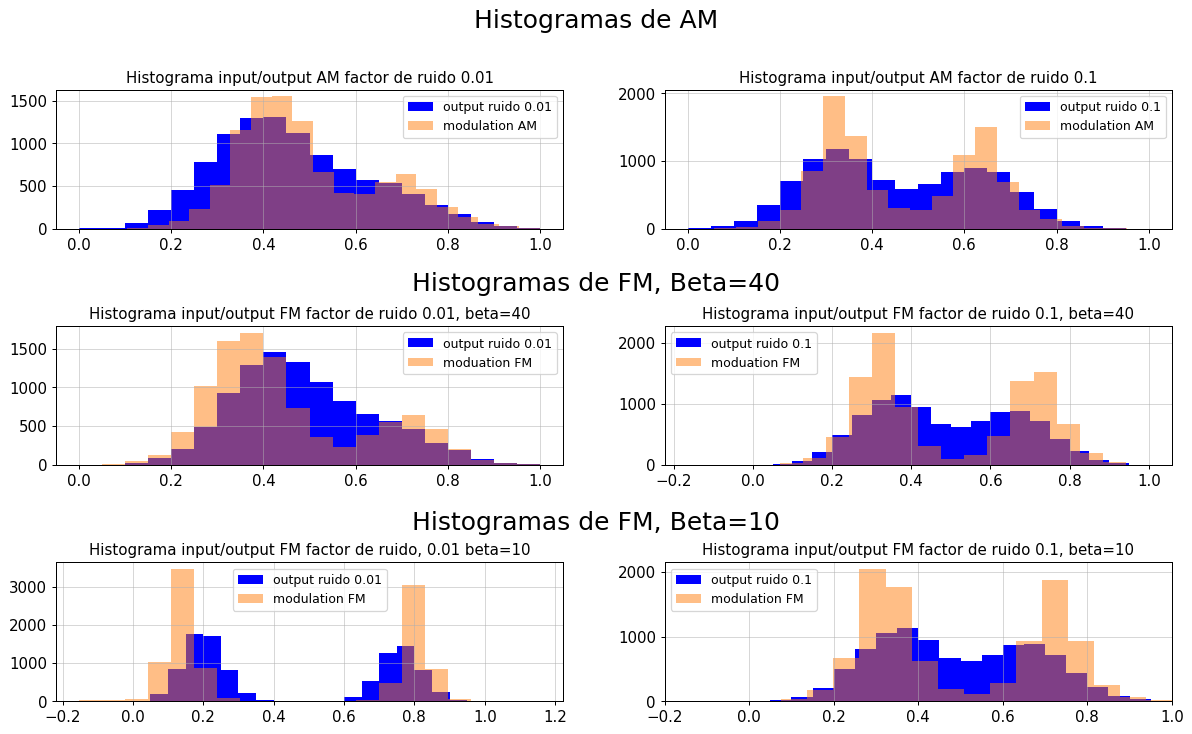

In [ ]:
fig = plt.figure(figsize=(16, 9), dpi=90)
# Histogramas AM
plt.subplot(321)
plt.hist(output0_n,20,color='blue', label='output ruido 0.01')
plt.hist(envelope2, 20, color='C1', alpha=0.5, label='modulation AM')
plt.title('Histograma input/output AM factor de ruido 0.01')
plt.legend()
plt.grid(True, alpha=0.5)

# Histogramas AM
plt.subplot(322)
plt.hist(output3_n,20,color='blue', label='output ruido 0.1')
plt.hist(envelope3, 20, color='C1', alpha=0.5, label='modulation AM')
plt.title('Histograma input/output AM factor de ruido 0.1')
plt.legend()
plt.grid(True, alpha=0.5)
plt.suptitle('Histogramas de AM', size=20)

# Histogramas FM
plt.subplot(323)
plt.hist(output_, 20, color='blue', label='output ruido 0.01')
plt.hist(envelope1, 20, color='C1', alpha=0.5, label='moduation FM')
plt.title('Histograma input/output FM factor de ruido 0.01, beta=40')
plt.legend()
plt.grid(True, alpha=0.5)

# Histogramas FM
plt.subplot(324)
plt.hist(output2_, 20, color='blue', label='output ruido 0.1')
plt.hist(envelope4, 20, color='C1', alpha=0.5, label='moduation FM')
plt.title('Histograma input/output FM factor de ruido 0.1, beta=40')
plt.legend()
plt.grid(True, alpha=0.5)

# Histogramas FM beta=10
plt.subplot(325)
plt.hist(output5_,20,color='blue', label='output ruido 0.01')
plt.hist(envelope13, 20, color='C1', alpha=0.5, label='modulation FM')
plt.title('Histograma input/output FM factor de ruido, 0.01 beta=10')
plt.legend()
plt.grid(True, alpha=0.5)

# Histogramas FM beta=10
plt.subplot(326)
plt.hist(output4_,20,color='blue', label='output ruido 0.1')
plt.hist(envelope14, 20, color='C1', alpha=0.5, label='modulation FM')
plt.title('Histograma input/output FM factor de ruido 0.1, beta=10')
plt.legend()
plt.xlim(-0.2, 1)
plt.grid(True, alpha=0.5)
plt.figtext(0.5, 0.64, 'Histogramas de FM, Beta=40', ha='center', va='center', size=20)
plt.figtext(0.5, 0.345, 'Histogramas de FM, Beta=10', ha='center', va='center', size=20)
plt.subplots_adjust(hspace=0.7)

### Modulacion y Demodulacion PWM

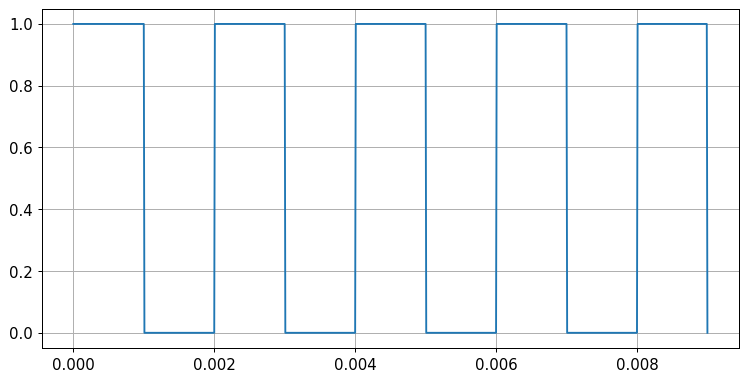

In [ ]:
t = np.linspace(0, 0.009, 1000)#asignamos el tiempo en el que vive y la cani¿tidad de muestras con las que se 
u1=np.piecewise(t,t>=0.002,[1,0])# se realizan dos escalones unitarios para la señal rectangular
u2=np.piecewise(t,t>=0.006,[1,0])
u = u1-u2 #se restan ambos escalones para representar la señal 
tr1=np.piecewise(t,t>=0.000,[1,0])
tr2=np.piecewise(t,t>=0.001,[1,0])
tr3=np.piecewise(t,t>=0.002,[1,0])
tr4=np.piecewise(t,t>=0.003,[1,0])
tr5=np.piecewise(t,t>=0.004,[1,0])
tr6=np.piecewise(t,t>=0.005,[1,0])
tr7=np.piecewise(t,t>=0.006,[1,0])
tr8=np.piecewise(t,t>=0.007,[1,0])
tr9=np.piecewise(t,t>=0.008,[1,0])
tr10=np.piecewise(t,t>=0.009,[1,0])
tren = tr1-tr2+tr3-tr4+tr5-tr6+tr7-tr8+tr9-tr10
plt.figure(figsize=(10, 5), dpi=90)
plt.grid(True)
plt.plot(t, tren)

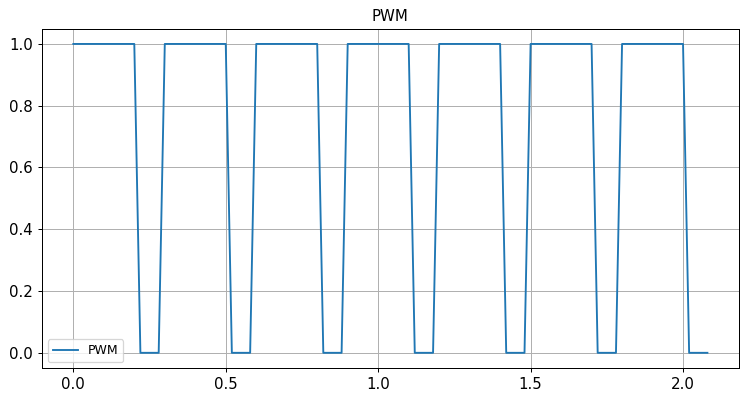

In [ ]:
percent=30.0
TimePeriod=0.3
Cycles=7
dt=0.02
plt.figure(figsize=(10,5),dpi=90)
t=np.arange(0,Cycles*TimePeriod,dt); 
pwm= t%TimePeriod<2.3*TimePeriod*percent/100
plt.title('PWM')
plt.plot(t,pwm, label='PWM')
plt.legend()
plt.grid(True)

In [ ]:
t4 = np.linspace(0,.4,105)
t_2, pulso = pulse(t4)
_,output2_,_= lti_system.output(pulso, t_2)
sap=output_
spwm=sap*pwm
plt.figure(figsize=(10,5),dpi=90)
plt.title('modulacion en PWM')
plt.plot(t4,pwm,label="señal portadora")
plt.plot(t4,spwm,label="Salida modulada en PWM")

plt.legend()
plt.xlabel("Tiempo (segundos)")
plt.ylabel("Amplitud")
plt.grid()

ValueError: ignored

In [ ]:
percent=30.0
TimePeriod=0.2
Cycles=10
dt=0.001

t=np.arange(0,Cycles*TimePeriod,dt); 
pwm= t%TimePeriod<2.3*TimePeriod*percent/100

t4 = np.linspace(0,.4,10000)
t_2, newpulse = pulse(t4)
_,output3_,_= lti_system.output(newpulse, t_2)
nsap=output3_
nspwm=pruido*pwm
plt.figure(figsize=(10,5),dpi=90)
plt.title('modulacion en PWM')
plt.plot(t4,pwm,label="señal portadora")
plt.plot(t4,nspwm,label="Salida modulada en PWM")
plt.legend()
plt.xlabel("Tiempo (segundos)")
plt.ylabel("Amplitud")
plt.grid()

ValueError: ignored

### Correlacion PWM

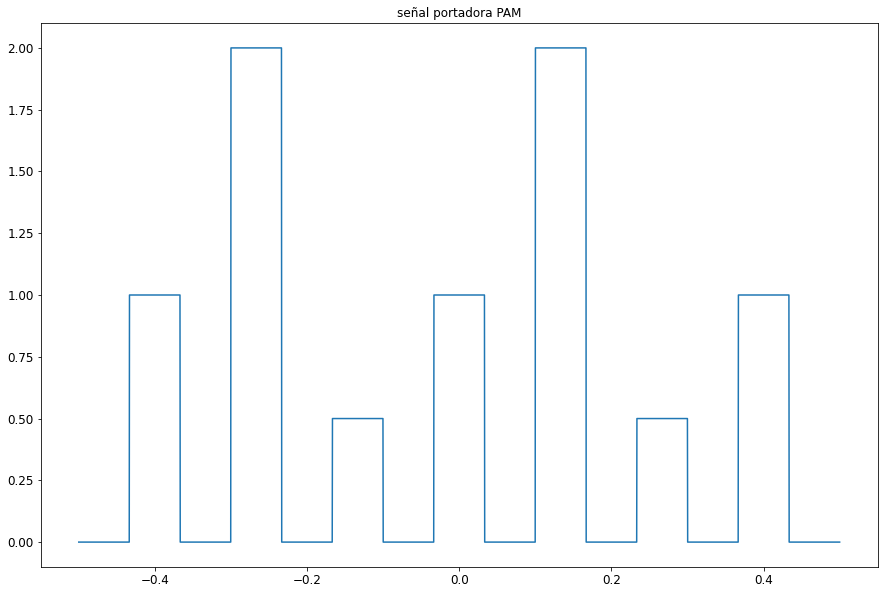

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

A = 1
T = 1 #5 segundos de grafica
Fs = 3000 # 500 muestras por segundo Ajustar según señal estudiada
Nm = T*Fs #numero de muestras requeridas
tv = np.linspace(-T/2,T/2,Nm)

pam = np.concatenate((-0*A*np.ones(int(200)), A*np.ones(int(200)), -0*A*np.ones(int(200)), (2*A*np.ones(int(200))),(-0*A*np.ones(int(200))),((A/2)*np.ones(int(200))),(-0*A*np.ones(int(200))),(A*np.ones(int(200))),(-0*A*np.ones(int(200))),2*A*np.ones(int(200)), -0*A*np.ones(int(200)), (A/2)*np.ones(int(200)), -0*A*np.ones(int(200)),A*np.ones(int(200)),-0*A*np.ones(int(200)), ), axis=0)
plt.figure(figsize=(15,10))
plt.title('señal portadora PAM')
plt.plot(tv,pam)

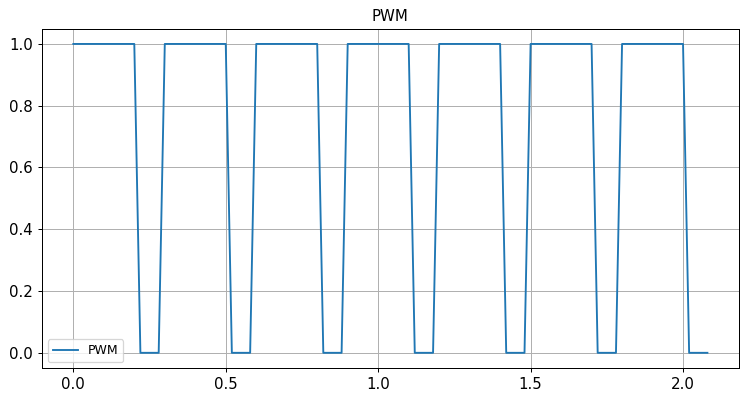

In [ ]:
percent=30.0
TimePeriod=0.3
Cycles=7
dt=0.02
plt.figure(figsize=(10,5),dpi=90)
t=np.arange(0,Cycles*TimePeriod,dt); 
pwm= t%TimePeriod<2.3*TimePeriod*percent/100
plt.title('PWM')
plt.plot(t,pwm, label='PWM')
plt.legend()
plt.grid(True)

In [ ]:
np.linspace(0,.4,10000)
t_2, pulso = pulse(t4)
_,output2_,_= lti_system.output(pulso, t_2)
sap=output_
spwm=sap*pwm
plt.figure(figsize=(10,5),dpi=90)
plt.title('modulacion en PWM')
plt.plot(t4,pwm,label="señal portadora")
plt.plot(t4,spwm,label="Salida modulada en PWM")
plt.legend()
plt.xlabel("Tiempo (segundos)")
plt.ylabel("Amplitud")
plt.grid()

ValueError: ignored

In [ ]:
pwmcorr=signal.correlate(sap,output_signalPWM)
t_corrpwm=np.linspace(-tam[-1], tam[-1] ,pwmcorr.shape[0])
plt.figure(figsize=(10,5),dpi=90)
plt.title("correlacion entre la entrada y salida demodulada en PWM")
plt.plot(t_corrpwm, pwmcorr)
plt.grid()

NameError: ignored

In [ ]:
npwmcorr=signal.correlate(pruido,output_signalnPWM)
t_corrnpwm=np.linspace(-tam[-1], tam[-1] ,npwmcorr.shape[0])
plt.figure(figsize=(10,5),dpi=90)
plt.title("correlacion entre la entrada y salida demodulada en PWM")
plt.plot(t_corrnpwm, npwmcorr)
plt.grid()

AttributeError: ignored